In [172]:
import pandas as pd
import numpy as np
import nltk
import string
import fasttext
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
# plt.xticks(rotation=70)
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)
%matplotlib inline

# Importing our Data

In [173]:
df = pd.read_csv('reviews.csv')
df.head()


,Rating,Heading,Description
0,5,Wonderful,Satisfactory product.
1,5,Awesome,"Good phone, Good Colour shining perfect Look & Perfect work & Reasonable price, but it is long s..."
2,5,Best in the market!,Lowest price good future
3,5,Simply awesome,Best in segment and uncompetitive
4,5,Excellent,Lowest price good features


# Selection of COls

In [174]:
rws = df.loc[:, ['Rating', 'Description']]
rws.head()

,Rating,Description
0,5,Satisfactory product.
1,5,"Good phone, Good Colour shining perfect Look & Perfect work & Reasonable price, but it is long s..."
2,5,Lowest price good future
3,5,Best in segment and uncompetitive
4,5,Lowest price good features


# Expanding Contractions

In [175]:
rws['no_contract'] = rws['Description'].apply(lambda x: [contractions.fix(word) for word in x.split()])
rws.head()

,Rating,Description,no_contract
0,5,Satisfactory product.,"[Satisfactory, product.]"
1,5,"Good phone, Good Colour shining perfect Look & Perfect work & Reasonable price, but it is long s...","[Good, phone,, Good, Colour, shining, perfect, Look, &, Perfect, work, &, Reasonable, price,, bu..."
2,5,Lowest price good future,"[Lowest, price, good, future]"
3,5,Best in segment and uncompetitive,"[Best, in, segment, and, uncompetitive]"
4,5,Lowest price good features,"[Lowest, price, good, features]"


In [176]:
rws['rating_description_str'] = [' '.join(map(str, l)) for l in rws['no_contract']]
rws.head()

,Rating,Description,no_contract,rating_description_str
0,5,Satisfactory product.,"[Satisfactory, product.]",Satisfactory product.
1,5,"Good phone, Good Colour shining perfect Look & Perfect work & Reasonable price, but it is long s...","[Good, phone,, Good, Colour, shining, perfect, Look, &, Perfect, work, &, Reasonable, price,, bu...","Good phone, Good Colour shining perfect Look & Perfect work & Reasonable price, but it is long s..."
2,5,Lowest price good future,"[Lowest, price, good, future]",Lowest price good future
3,5,Best in segment and uncompetitive,"[Best, in, segment, and, uncompetitive]",Best in segment and uncompetitive
4,5,Lowest price good features,"[Lowest, price, good, features]",Lowest price good features


# Tokenization

In [177]:
nltk.download('punkt')
rws['tokenized'] = rws['rating_description_str'].apply(word_tokenize)
rws.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Rating,Description,no_contract,rating_description_str,tokenized
0,5,Satisfactory product.,"[Satisfactory, product.]",Satisfactory product.,"[Satisfactory, product, .]"
1,5,"Good phone, Good Colour shining perfect Look & Perfect work & Reasonable price, but it is long s...","[Good, phone,, Good, Colour, shining, perfect, Look, &, Perfect, work, &, Reasonable, price,, bu...","Good phone, Good Colour shining perfect Look & Perfect work & Reasonable price, but it is long s...","[Good, phone, ,, Good, Colour, shining, perfect, Look, &, Perfect, work, &, Reasonable, price, ,..."
2,5,Lowest price good future,"[Lowest, price, good, future]",Lowest price good future,"[Lowest, price, good, future]"
3,5,Best in segment and uncompetitive,"[Best, in, segment, and, uncompetitive]",Best in segment and uncompetitive,"[Best, in, segment, and, uncompetitive]"
4,5,Lowest price good features,"[Lowest, price, good, features]",Lowest price good features,"[Lowest, price, good, features]"


# Converting all Characters to Lowercase

In [178]:
rws['lower'] = rws['tokenized'].apply(lambda x: [word.lower() for word in x])
rws.head()

,Rating,Description,no_contract,rating_description_str,tokenized,lower
0,5,Satisfactory product.,"[Satisfactory, product.]",Satisfactory product.,"[Satisfactory, product, .]","[satisfactory, product, .]"
1,5,"Good phone, Good Colour shining perfect Look & Perfect work & Reasonable price, but it is long s...","[Good, phone,, Good, Colour, shining, perfect, Look, &, Perfect, work, &, Reasonable, price,, bu...","Good phone, Good Colour shining perfect Look & Perfect work & Reasonable price, but it is long s...","[Good, phone, ,, Good, Colour, shining, perfect, Look, &, Perfect, work, &, Reasonable, price, ,...","[good, phone, ,, good, colour, shining, perfect, look, &, perfect, work, &, reasonable, price, ,..."
2,5,Lowest price good future,"[Lowest, price, good, future]",Lowest price good future,"[Lowest, price, good, future]","[lowest, price, good, future]"
3,5,Best in segment and uncompetitive,"[Best, in, segment, and, uncompetitive]",Best in segment and uncompetitive,"[Best, in, segment, and, uncompetitive]","[best, in, segment, and, uncompetitive]"
4,5,Lowest price good features,"[Lowest, price, good, features]",Lowest price good features,"[Lowest, price, good, features]","[lowest, price, good, features]"


# Removing Punctuations

In [179]:
punc = string.punctuation
rws['no_punc'] = rws['lower'].apply(lambda x: [word for word in x if word not in punc])
rws.head()

,Rating,Description,no_contract,rating_description_str,tokenized,lower,no_punc
0,5,Satisfactory product.,"[Satisfactory, product.]",Satisfactory product.,"[Satisfactory, product, .]","[satisfactory, product, .]","[satisfactory, product]"
1,5,"Good phone, Good Colour shining perfect Look & Perfect work & Reasonable price, but it is long s...","[Good, phone,, Good, Colour, shining, perfect, Look, &, Perfect, work, &, Reasonable, price,, bu...","Good phone, Good Colour shining perfect Look & Perfect work & Reasonable price, but it is long s...","[Good, phone, ,, Good, Colour, shining, perfect, Look, &, Perfect, work, &, Reasonable, price, ,...","[good, phone, ,, good, colour, shining, perfect, look, &, perfect, work, &, reasonable, price, ,...","[good, phone, good, colour, shining, perfect, look, perfect, work, reasonable, price, but, it, i..."
2,5,Lowest price good future,"[Lowest, price, good, future]",Lowest price good future,"[Lowest, price, good, future]","[lowest, price, good, future]","[lowest, price, good, future]"
3,5,Best in segment and uncompetitive,"[Best, in, segment, and, uncompetitive]",Best in segment and uncompetitive,"[Best, in, segment, and, uncompetitive]","[best, in, segment, and, uncompetitive]","[best, in, segment, and, uncompetitive]"
4,5,Lowest price good features,"[Lowest, price, good, features]",Lowest price good features,"[Lowest, price, good, features]","[lowest, price, good, features]","[lowest, price, good, features]"


# Removing Stopwords

In [180]:
stop_words = set(stopwords.words('english'))
rws['stopwords_removed'] = rws['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])
rws.head()

,Rating,Description,no_contract,rating_description_str,tokenized,lower,no_punc,stopwords_removed
0,5,Satisfactory product.,"[Satisfactory, product.]",Satisfactory product.,"[Satisfactory, product, .]","[satisfactory, product, .]","[satisfactory, product]","[satisfactory, product]"
1,5,"Good phone, Good Colour shining perfect Look & Perfect work & Reasonable price, but it is long s...","[Good, phone,, Good, Colour, shining, perfect, Look, &, Perfect, work, &, Reasonable, price,, bu...","Good phone, Good Colour shining perfect Look & Perfect work & Reasonable price, but it is long s...","[Good, phone, ,, Good, Colour, shining, perfect, Look, &, Perfect, work, &, Reasonable, price, ,...","[good, phone, ,, good, colour, shining, perfect, look, &, perfect, work, &, reasonable, price, ,...","[good, phone, good, colour, shining, perfect, look, perfect, work, reasonable, price, but, it, i...","[good, phone, good, colour, shining, perfect, look, perfect, work, reasonable, price, long, size..."
2,5,Lowest price good future,"[Lowest, price, good, future]",Lowest price good future,"[Lowest, price, good, future]","[lowest, price, good, future]","[lowest, price, good, future]","[lowest, price, good, future]"
3,5,Best in segment and uncompetitive,"[Best, in, segment, and, uncompetitive]",Best in segment and uncompetitive,"[Best, in, segment, and, uncompetitive]","[best, in, segment, and, uncompetitive]","[best, in, segment, and, uncompetitive]","[best, segment, uncompetitive]"
4,5,Lowest price good features,"[Lowest, price, good, features]",Lowest price good features,"[Lowest, price, good, features]","[lowest, price, good, features]","[lowest, price, good, features]","[lowest, price, good, features]"


# Stemming vs Lemmatization

In [181]:
nltk.download('averaged_perceptron_tagger')
rws['pos_tags'] = rws['stopwords_removed'].apply(nltk.tag.pos_tag)
rws.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Rating,Description,no_contract,rating_description_str,tokenized,lower,no_punc,stopwords_removed,pos_tags
0,5,Satisfactory product.,"[Satisfactory, product.]",Satisfactory product.,"[Satisfactory, product, .]","[satisfactory, product, .]","[satisfactory, product]","[satisfactory, product]","[(satisfactory, JJ), (product, NN)]"
1,5,"Good phone, Good Colour shining perfect Look & Perfect work & Reasonable price, but it is long s...","[Good, phone,, Good, Colour, shining, perfect, Look, &, Perfect, work, &, Reasonable, price,, bu...","Good phone, Good Colour shining perfect Look & Perfect work & Reasonable price, but it is long s...","[Good, phone, ,, Good, Colour, shining, perfect, Look, &, Perfect, work, &, Reasonable, price, ,...","[good, phone, ,, good, colour, shining, perfect, look, &, perfect, work, &, reasonable, price, ,...","[good, phone, good, colour, shining, perfect, look, perfect, work, reasonable, price, but, it, i...","[good, phone, good, colour, shining, perfect, look, perfect, work, reasonable, price, long, size...","[(good, JJ), (phone, NN), (good, JJ), (colour, NN), (shining, VBG), (perfect, JJ), (look, NN), (..."
2,5,Lowest price good future,"[Lowest, price, good, future]",Lowest price good future,"[Lowest, price, good, future]","[lowest, price, good, future]","[lowest, price, good, future]","[lowest, price, good, future]","[(lowest, JJS), (price, NN), (good, JJ), (future, NN)]"
3,5,Best in segment and uncompetitive,"[Best, in, segment, and, uncompetitive]",Best in segment and uncompetitive,"[Best, in, segment, and, uncompetitive]","[best, in, segment, and, uncompetitive]","[best, in, segment, and, uncompetitive]","[best, segment, uncompetitive]","[(best, RBS), (segment, NN), (uncompetitive, JJ)]"
4,5,Lowest price good features,"[Lowest, price, good, features]",Lowest price good features,"[Lowest, price, good, features]","[lowest, price, good, features]","[lowest, price, good, features]","[lowest, price, good, features]","[(lowest, JJS), (price, NN), (good, NN), (features, NNS)]"


In [182]:
nltk.download('wordnet')
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
rws['wordnet_pos'] = rws['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
rws.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Rating,Description,no_contract,rating_description_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos
0,5,Satisfactory product.,"[Satisfactory, product.]",Satisfactory product.,"[Satisfactory, product, .]","[satisfactory, product, .]","[satisfactory, product]","[satisfactory, product]","[(satisfactory, JJ), (product, NN)]","[(satisfactory, a), (product, n)]"
1,5,"Good phone, Good Colour shining perfect Look & Perfect work & Reasonable price, but it is long s...","[Good, phone,, Good, Colour, shining, perfect, Look, &, Perfect, work, &, Reasonable, price,, bu...","Good phone, Good Colour shining perfect Look & Perfect work & Reasonable price, but it is long s...","[Good, phone, ,, Good, Colour, shining, perfect, Look, &, Perfect, work, &, Reasonable, price, ,...","[good, phone, ,, good, colour, shining, perfect, look, &, perfect, work, &, reasonable, price, ,...","[good, phone, good, colour, shining, perfect, look, perfect, work, reasonable, price, but, it, i...","[good, phone, good, colour, shining, perfect, look, perfect, work, reasonable, price, long, size...","[(good, JJ), (phone, NN), (good, JJ), (colour, NN), (shining, VBG), (perfect, JJ), (look, NN), (...","[(good, a), (phone, n), (good, a), (colour, n), (shining, v), (perfect, a), (look, n), (perfect,..."
2,5,Lowest price good future,"[Lowest, price, good, future]",Lowest price good future,"[Lowest, price, good, future]","[lowest, price, good, future]","[lowest, price, good, future]","[lowest, price, good, future]","[(lowest, JJS), (price, NN), (good, JJ), (future, NN)]","[(lowest, a), (price, n), (good, a), (future, n)]"
3,5,Best in segment and uncompetitive,"[Best, in, segment, and, uncompetitive]",Best in segment and uncompetitive,"[Best, in, segment, and, uncompetitive]","[best, in, segment, and, uncompetitive]","[best, in, segment, and, uncompetitive]","[best, segment, uncompetitive]","[(best, RBS), (segment, NN), (uncompetitive, JJ)]","[(best, r), (segment, n), (uncompetitive, a)]"
4,5,Lowest price good features,"[Lowest, price, good, features]",Lowest price good features,"[Lowest, price, good, features]","[lowest, price, good, features]","[lowest, price, good, features]","[lowest, price, good, features]","[(lowest, JJS), (price, NN), (good, NN), (features, NNS)]","[(lowest, a), (price, n), (good, n), (features, n)]"


In [183]:
wnl = WordNetLemmatizer()
rws['lemmatized'] = rws['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
rws.head()

,Rating,Description,no_contract,rating_description_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,5,Satisfactory product.,"[Satisfactory, product.]",Satisfactory product.,"[Satisfactory, product, .]","[satisfactory, product, .]","[satisfactory, product]","[satisfactory, product]","[(satisfactory, JJ), (product, NN)]","[(satisfactory, a), (product, n)]","[satisfactory, product]"
1,5,"Good phone, Good Colour shining perfect Look & Perfect work & Reasonable price, but it is long s...","[Good, phone,, Good, Colour, shining, perfect, Look, &, Perfect, work, &, Reasonable, price,, bu...","Good phone, Good Colour shining perfect Look & Perfect work & Reasonable price, but it is long s...","[Good, phone, ,, Good, Colour, shining, perfect, Look, &, Perfect, work, &, Reasonable, price, ,...","[good, phone, ,, good, colour, shining, perfect, look, &, perfect, work, &, reasonable, price, ,...","[good, phone, good, colour, shining, perfect, look, perfect, work, reasonable, price, but, it, i...","[good, phone, good, colour, shining, perfect, look, perfect, work, reasonable, price, long, size...","[(good, JJ), (phone, NN), (good, JJ), (colour, NN), (shining, VBG), (perfect, JJ), (look, NN), (...","[(good, a), (phone, n), (good, a), (colour, n), (shining, v), (perfect, a), (look, n), (perfect,...","[good, phone, good, colour, shin, perfect, look, perfect, work, reasonable, price, long, size, l..."
2,5,Lowest price good future,"[Lowest, price, good, future]",Lowest price good future,"[Lowest, price, good, future]","[lowest, price, good, future]","[lowest, price, good, future]","[lowest, price, good, future]","[(lowest, JJS), (price, NN), (good, JJ), (future, NN)]","[(lowest, a), (price, n), (good, a), (future, n)]","[low, price, good, future]"
3,5,Best in segment and uncompetitive,"[Best, in, segment, and, uncompetitive]",Best in segment and uncompetitive,"[Best, in, segment, and, uncompetitive]","[best, in, segment, and, uncompetitive]","[best, in, segment, and, uncompetitive]","[best, segment, uncompetitive]","[(best, RBS), (segment, NN), (uncompetitive, JJ)]","[(best, r), (segment, n), (uncompetitive, a)]","[best, segment, uncompetitive]"
4,5,Lowest price good features,"[Lowest, price, good, features]",Lowest price good features,"[Lowest, price, good, features]","[lowest, price, good, features]","[lowest, price, good, features]","[lowest, price, good, features]","[(lowest, JJS), (price, NN), (good, NN), (features, NNS)]","[(lowest, a), (price, n), (good, n), (features, n)]","[low, price, good, feature]"


In [184]:
rws.to_csv('indeed_scrape_clean.csv')

# Analysis of Text Data

In [185]:
import pandas as pd
import numpy as np
import nltk
import pickle
import pyLDAvis.sklearn
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
df = pd.read_csv('indeed_scrape_clean.csv')
df.head()


,Unnamed: 0,Rating,Description,no_contract,rating_description_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,0,5,Satisfactory product.,"['Satisfactory', 'product.']",Satisfactory product.,"['Satisfactory', 'product', '.']","['satisfactory', 'product', '.']","['satisfactory', 'product']","['satisfactory', 'product']","[('satisfactory', 'JJ'), ('product', 'NN')]","[('satisfactory', 'a'), ('product', 'n')]","['satisfactory', 'product']"
1,1,5,"Good phone, Good Colour shining perfect Look & Perfect work & Reasonable price, but it is long s...","['Good', 'phone,', 'Good', 'Colour', 'shining', 'perfect', 'Look', '&', 'Perfect', 'work', '&', ...","Good phone, Good Colour shining perfect Look & Perfect work & Reasonable price, but it is long s...","['Good', 'phone', ',', 'Good', 'Colour', 'shining', 'perfect', 'Look', '&', 'Perfect', 'work', '...","['good', 'phone', ',', 'good', 'colour', 'shining', 'perfect', 'look', '&', 'perfect', 'work', '...","['good', 'phone', 'good', 'colour', 'shining', 'perfect', 'look', 'perfect', 'work', 'reasonable...","['good', 'phone', 'good', 'colour', 'shining', 'perfect', 'look', 'perfect', 'work', 'reasonable...","[('good', 'JJ'), ('phone', 'NN'), ('good', 'JJ'), ('colour', 'NN'), ('shining', 'VBG'), ('perfec...","[('good', 'a'), ('phone', 'n'), ('good', 'a'), ('colour', 'n'), ('shining', 'v'), ('perfect', 'a...","['good', 'phone', 'good', 'colour', 'shin', 'perfect', 'look', 'perfect', 'work', 'reasonable', ..."
2,2,5,Lowest price good future,"['Lowest', 'price', 'good', 'future']",Lowest price good future,"['Lowest', 'price', 'good', 'future']","['lowest', 'price', 'good', 'future']","['lowest', 'price', 'good', 'future']","['lowest', 'price', 'good', 'future']","[('lowest', 'JJS'), ('price', 'NN'), ('good', 'JJ'), ('future', 'NN')]","[('lowest', 'a'), ('price', 'n'), ('good', 'a'), ('future', 'n')]","['low', 'price', 'good', 'future']"
3,3,5,Best in segment and uncompetitive,"['Best', 'in', 'segment', 'and', 'uncompetitive']",Best in segment and uncompetitive,"['Best', 'in', 'segment', 'and', 'uncompetitive']","['best', 'in', 'segment', 'and', 'uncompetitive']","['best', 'in', 'segment', 'and', 'uncompetitive']","['best', 'segment', 'uncompetitive']","[('best', 'RBS'), ('segment', 'NN'), ('uncompetitive', 'JJ')]","[('best', 'r'), ('segment', 'n'), ('uncompetitive', 'a')]","['best', 'segment', 'uncompetitive']"
4,4,5,Lowest price good features,"['Lowest', 'price', 'good', 'features']",Lowest price good features,"['Lowest', 'price', 'good', 'features']","['lowest', 'price', 'good', 'features']","['lowest', 'price', 'good', 'features']","['lowest', 'price', 'good', 'features']","[('lowest', 'JJS'), ('price', 'NN'), ('good', 'NN'), ('features', 'NNS')]","[('lowest', 'a'), ('price', 'n'), ('good', 'n'), ('features', 'n')]","['low', 'price', 'good', 'feature']"


In [187]:
df.drop('Unnamed: 0', axis=1, inplace=True)


In [188]:
df.head()

,Rating,Description,no_contract,rating_description_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,5,Satisfactory product.,"['Satisfactory', 'product.']",Satisfactory product.,"['Satisfactory', 'product', '.']","['satisfactory', 'product', '.']","['satisfactory', 'product']","['satisfactory', 'product']","[('satisfactory', 'JJ'), ('product', 'NN')]","[('satisfactory', 'a'), ('product', 'n')]","['satisfactory', 'product']"
1,5,"Good phone, Good Colour shining perfect Look & Perfect work & Reasonable price, but it is long s...","['Good', 'phone,', 'Good', 'Colour', 'shining', 'perfect', 'Look', '&', 'Perfect', 'work', '&', ...","Good phone, Good Colour shining perfect Look & Perfect work & Reasonable price, but it is long s...","['Good', 'phone', ',', 'Good', 'Colour', 'shining', 'perfect', 'Look', '&', 'Perfect', 'work', '...","['good', 'phone', ',', 'good', 'colour', 'shining', 'perfect', 'look', '&', 'perfect', 'work', '...","['good', 'phone', 'good', 'colour', 'shining', 'perfect', 'look', 'perfect', 'work', 'reasonable...","['good', 'phone', 'good', 'colour', 'shining', 'perfect', 'look', 'perfect', 'work', 'reasonable...","[('good', 'JJ'), ('phone', 'NN'), ('good', 'JJ'), ('colour', 'NN'), ('shining', 'VBG'), ('perfec...","[('good', 'a'), ('phone', 'n'), ('good', 'a'), ('colour', 'n'), ('shining', 'v'), ('perfect', 'a...","['good', 'phone', 'good', 'colour', 'shin', 'perfect', 'look', 'perfect', 'work', 'reasonable', ..."
2,5,Lowest price good future,"['Lowest', 'price', 'good', 'future']",Lowest price good future,"['Lowest', 'price', 'good', 'future']","['lowest', 'price', 'good', 'future']","['lowest', 'price', 'good', 'future']","['lowest', 'price', 'good', 'future']","[('lowest', 'JJS'), ('price', 'NN'), ('good', 'JJ'), ('future', 'NN')]","[('lowest', 'a'), ('price', 'n'), ('good', 'a'), ('future', 'n')]","['low', 'price', 'good', 'future']"
3,5,Best in segment and uncompetitive,"['Best', 'in', 'segment', 'and', 'uncompetitive']",Best in segment and uncompetitive,"['Best', 'in', 'segment', 'and', 'uncompetitive']","['best', 'in', 'segment', 'and', 'uncompetitive']","['best', 'in', 'segment', 'and', 'uncompetitive']","['best', 'segment', 'uncompetitive']","[('best', 'RBS'), ('segment', 'NN'), ('uncompetitive', 'JJ')]","[('best', 'r'), ('segment', 'n'), ('uncompetitive', 'a')]","['best', 'segment', 'uncompetitive']"
4,5,Lowest price good features,"['Lowest', 'price', 'good', 'features']",Lowest price good features,"['Lowest', 'price', 'good', 'features']","['lowest', 'price', 'good', 'features']","['lowest', 'price', 'good', 'features']","['lowest', 'price', 'good', 'features']","[('lowest', 'JJS'), ('price', 'NN'), ('good', 'NN'), ('features', 'NNS')]","[('lowest', 'a'), ('price', 'n'), ('good', 'n'), ('features', 'n')]","['low', 'price', 'good', 'feature']"


In [189]:
df = df[['Rating', 'lemmatized']]
df.head()

,Rating,lemmatized
0,5,"['satisfactory', 'product']"
1,5,"['good', 'phone', 'good', 'colour', 'shin', 'perfect', 'look', 'perfect', 'work', 'reasonable', ..."
2,5,"['low', 'price', 'good', 'future']"
3,5,"['best', 'segment', 'uncompetitive']"
4,5,"['low', 'price', 'good', 'feature']"


In [207]:
import ast 
df['lemma_str'] = [l for l in df['lemmatized']]
len(df['lemmatized'])
for idx,l in enumerate(df['lemmatized']):
    l = ast.literal_eval(l) 
    df['lemmatized'][idx] = l
    df['lemma_str'][idx] = ' '.join(map(str,l))
    
df.head(2)

,Rating,lemmatized,lemma_str,sentiment,word_count,review_len
0,5,"[satisfactory, product]",satisfactory product,0.000000,2,20
1,5,"[good, phone, good, colour, shin, perfect, look, perfect, work, reasonable, price, long, size, l...",good phone good colour shin perfect look perfect work reasonable price long size like recommend,0.591667,15,95


In [208]:
df['sentiment'] = df['lemma_str'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head()

,Rating,lemmatized,lemma_str,sentiment,word_count,review_len
0,5,"[satisfactory, product]",satisfactory product,0.000000,2,20
1,5,"[good, phone, good, colour, shin, perfect, look, perfect, work, reasonable, price, long, size, l...",good phone good colour shin perfect look perfect work reasonable price long size like recommend,0.591667,15,95
2,5,"[low, price, good, future]",low price good future,0.233333,4,21
3,5,"[best, segment, uncompetitive]",best segment uncompetitive,1.000000,3,26
4,5,"[low, price, good, feature]",low price good feature,0.350000,4,22


# Sentiment Distribution

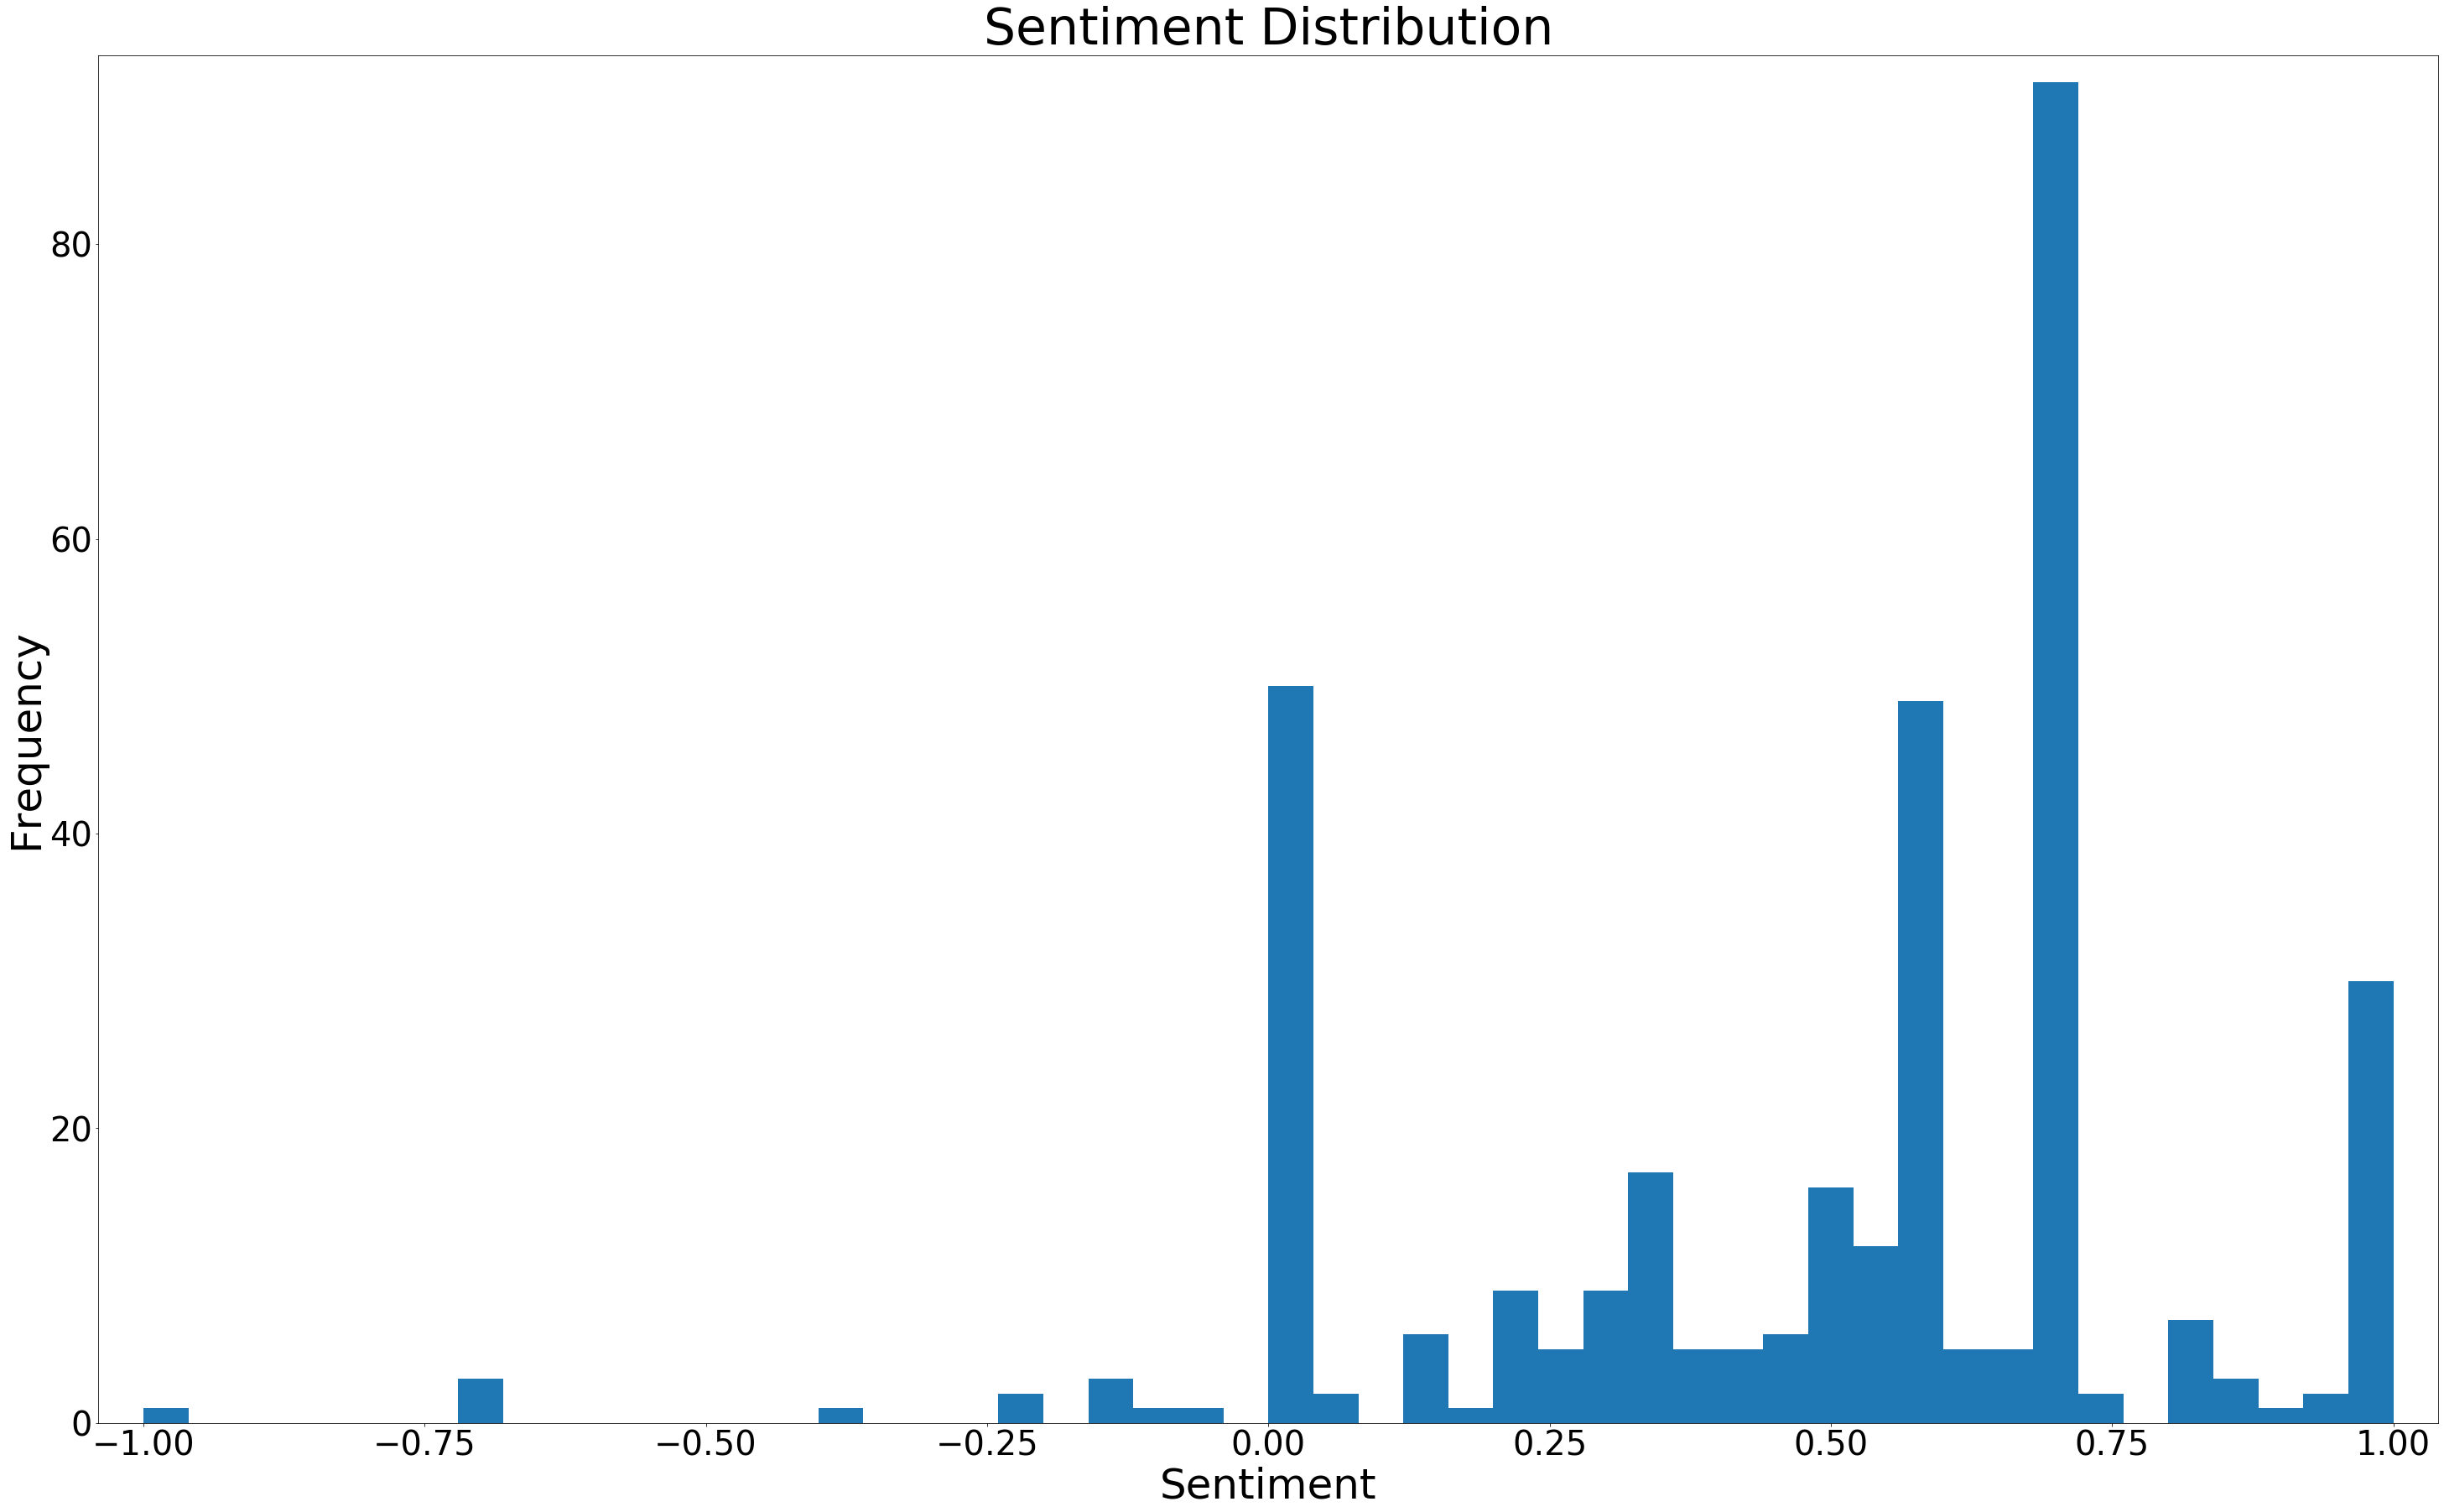

In [209]:
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(df['sentiment'], bins=50)
plt.title('Sentiment Distribution', fontsize=60)
plt.show()

# Rating Distribution

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

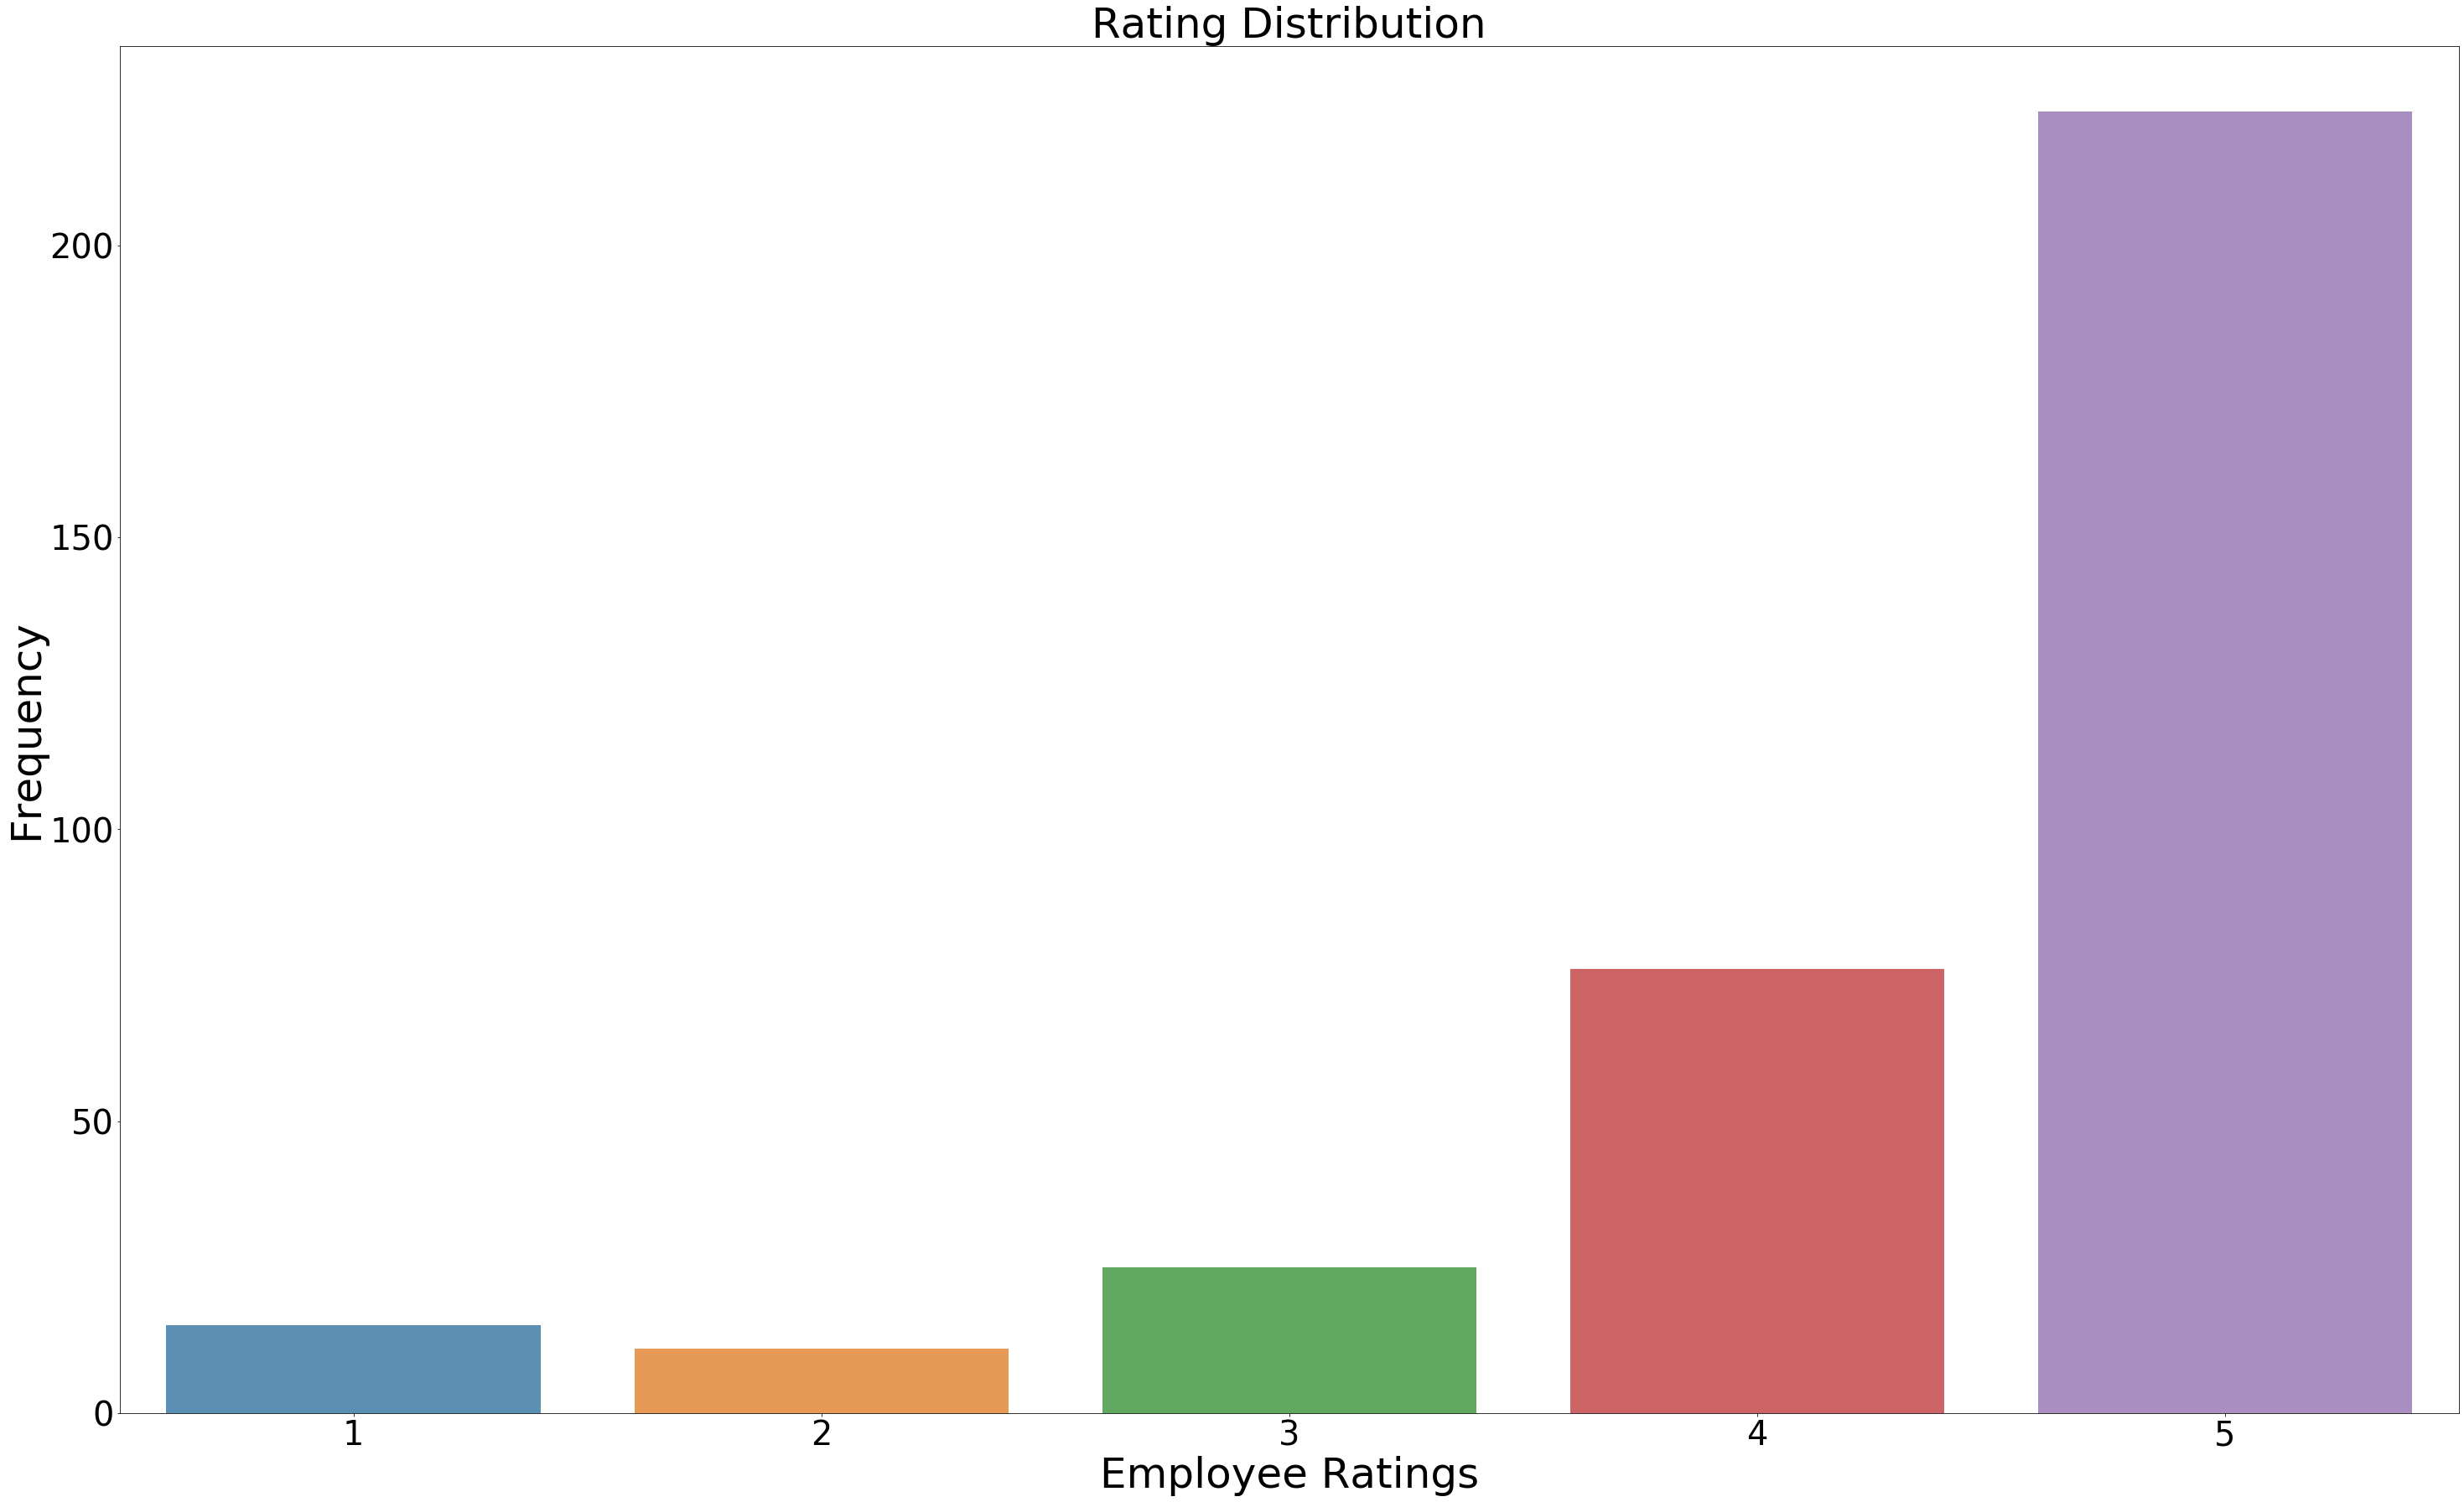

In [210]:
x_rating = df.Rating.value_counts()
y_rating = x_rating.sort_index()
plt.figure(figsize=(50,30))
sns.barplot(x_rating.index, x_rating.values, alpha=0.8)
plt.title("Rating Distribution", fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Employee Ratings', fontsize=50)
plt.xticks(fontsize=40)

# Percentage of Ratings

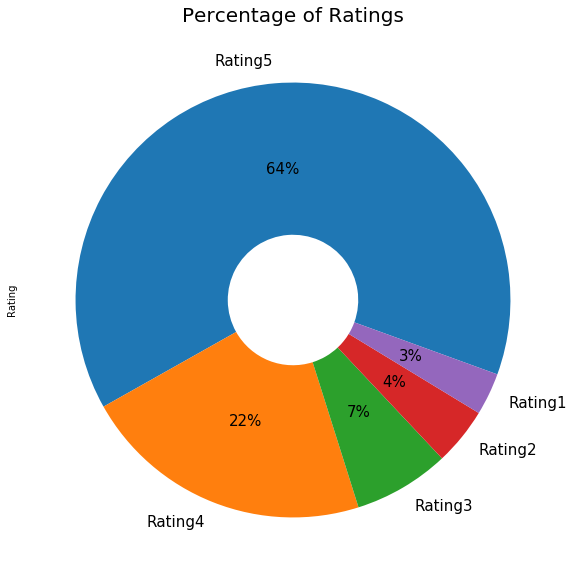

In [211]:
plt.figure(figsize=(30,10))
plt.title('Percentage of Ratings', fontsize=20)
df.Rating.value_counts().plot(kind='pie', labels=['Rating5', 'Rating4', 'Rating3', 'Rating2', 'Rating1'],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})

# Average Sentiment per Rating Distribution

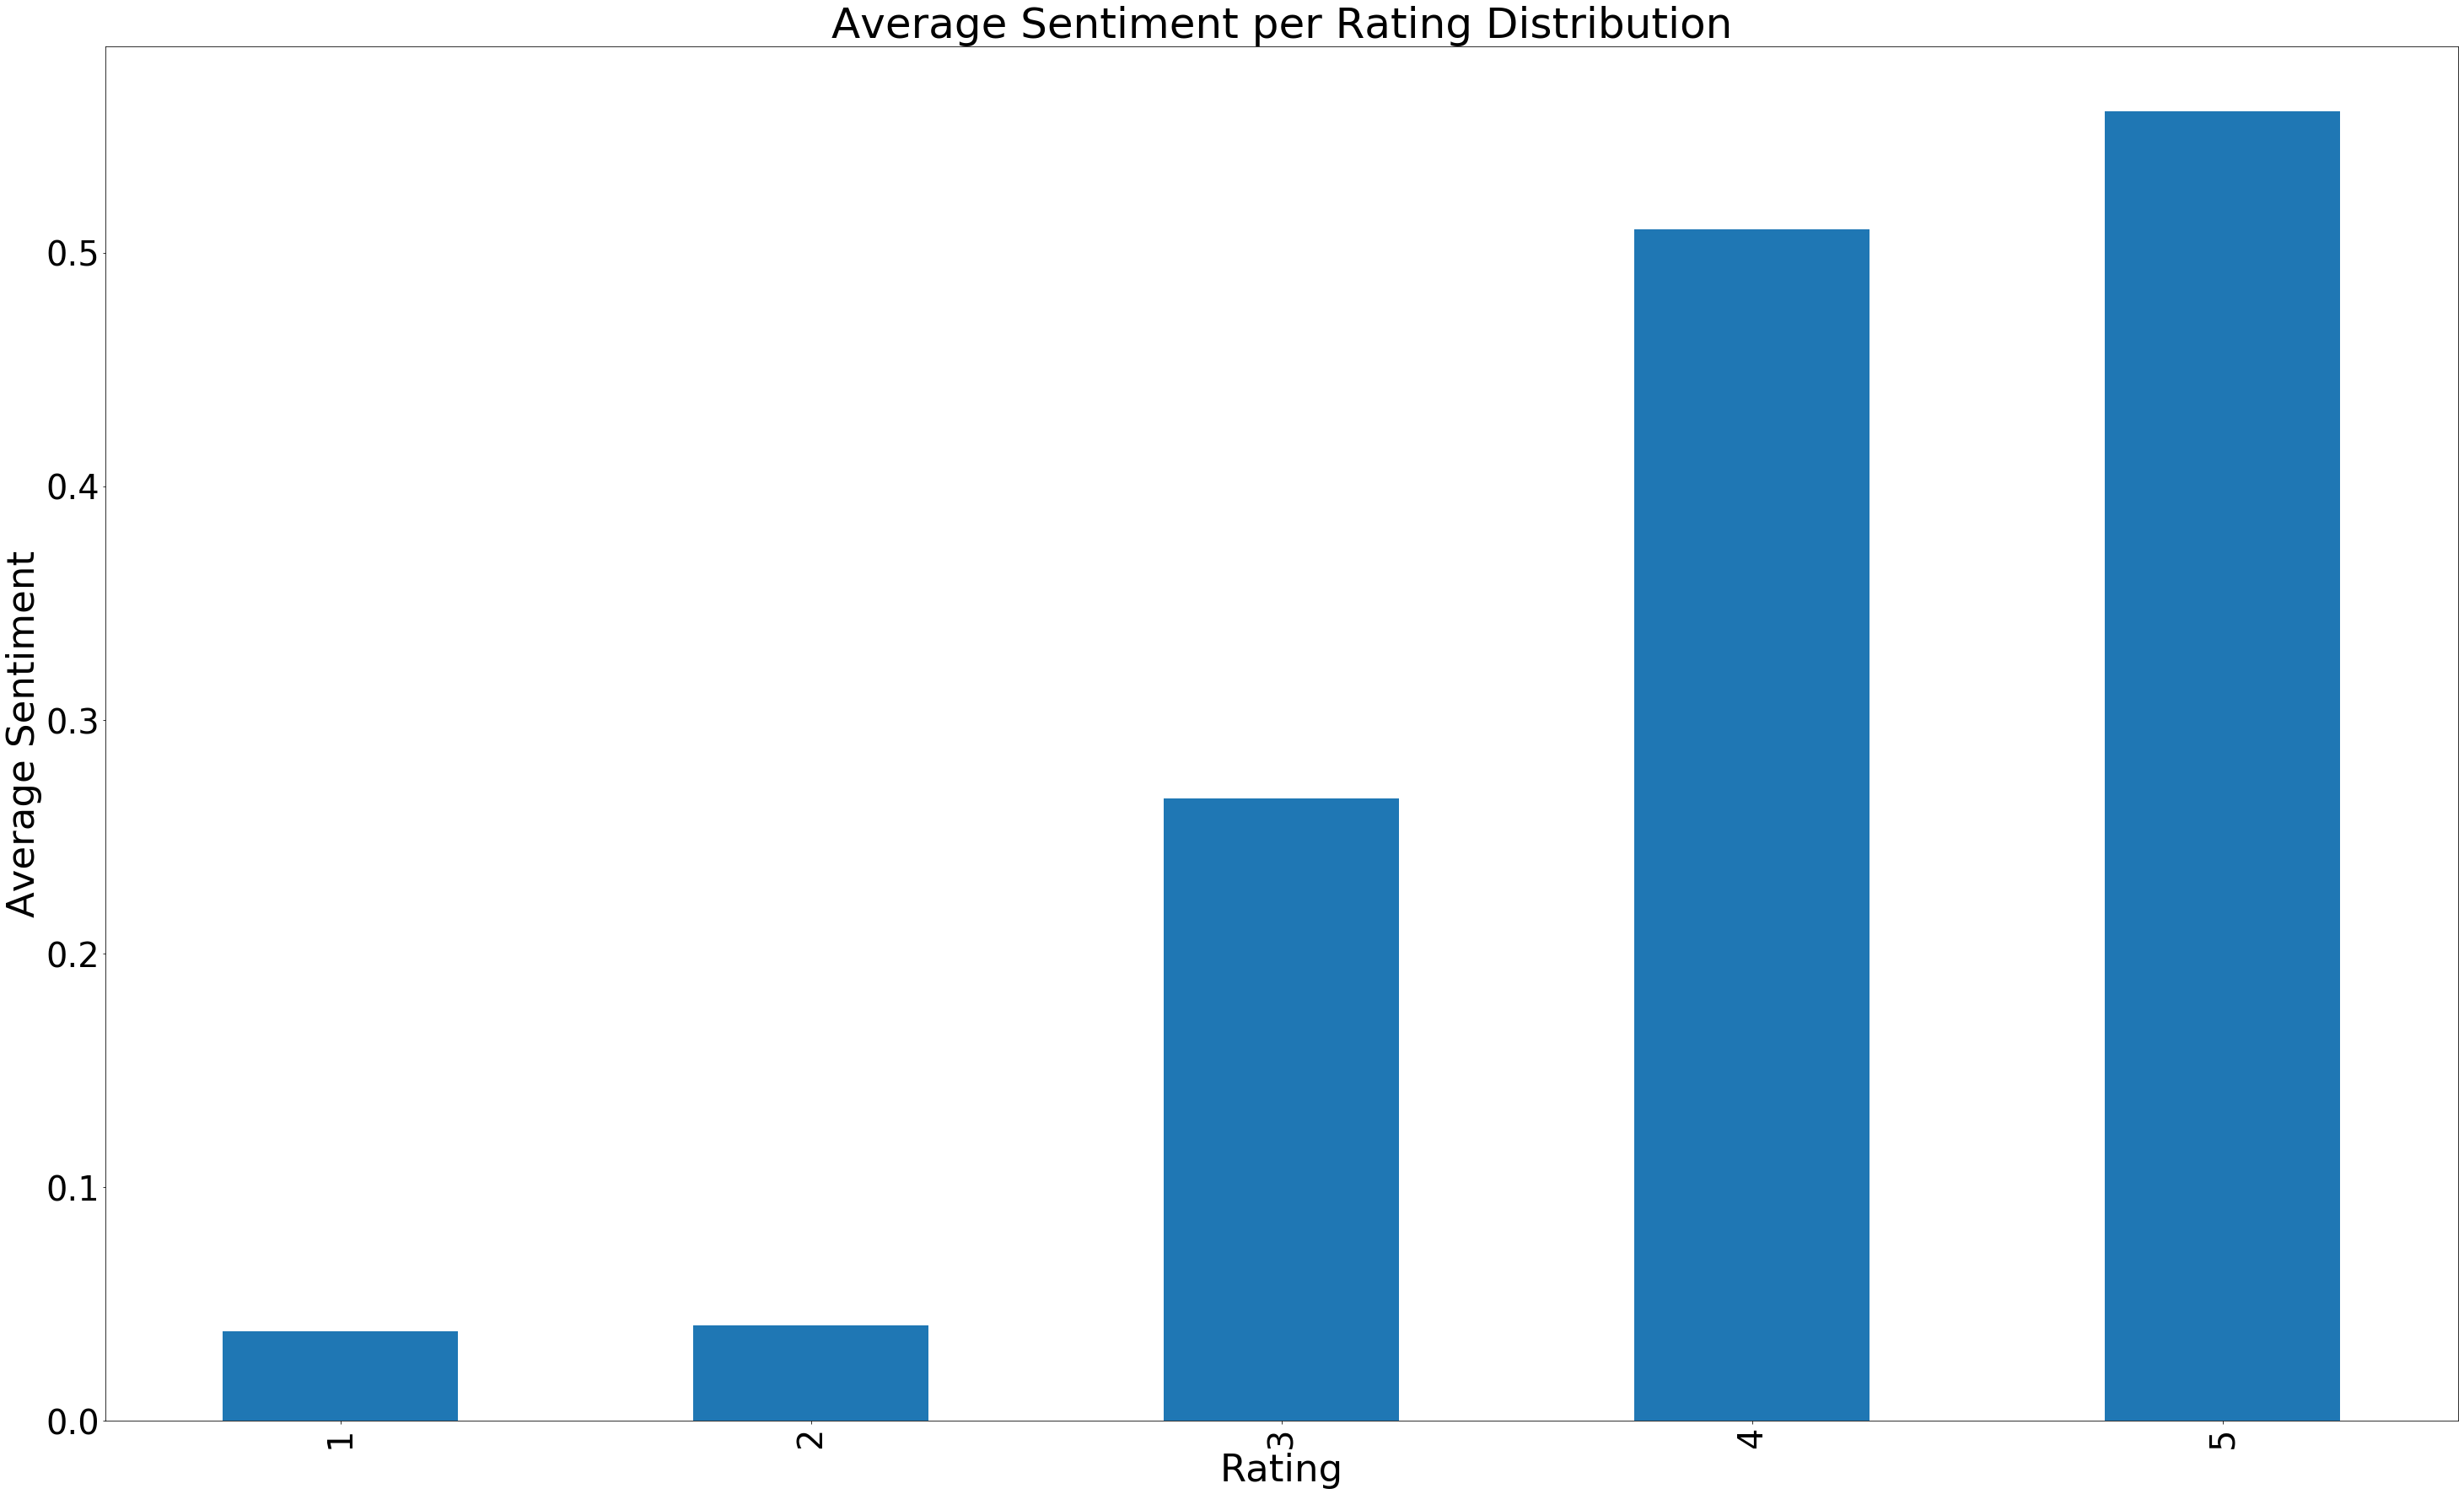

In [212]:
polarity_avg = df.groupby('Rating')['sentiment'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Rating', fontsize=45)
plt.ylabel('Average Sentiment', fontsize=45)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Sentiment per Rating Distribution', fontsize=50)
plt.show()

In [213]:
df['word_count'] = df['lemmatized'].apply(lambda x: len(str(x).split()))
df['review_len'] = df['lemma_str'].astype(str).apply(len)
df.head()

,Rating,lemmatized,lemma_str,sentiment,word_count,review_len
0,5,"[satisfactory, product]",satisfactory product,0.000000,2,20
1,5,"[good, phone, good, colour, shin, perfect, look, perfect, work, reasonable, price, long, size, l...",good phone good colour shin perfect look perfect work reasonable price long size like recommend,0.591667,15,95
2,5,"[low, price, good, future]",low price good future,0.233333,4,21
3,5,"[best, segment, uncompetitive]",best segment uncompetitive,1.000000,3,26
4,5,"[low, price, good, feature]",low price good feature,0.350000,4,22


# Average Number of Letters per Rating Distribution

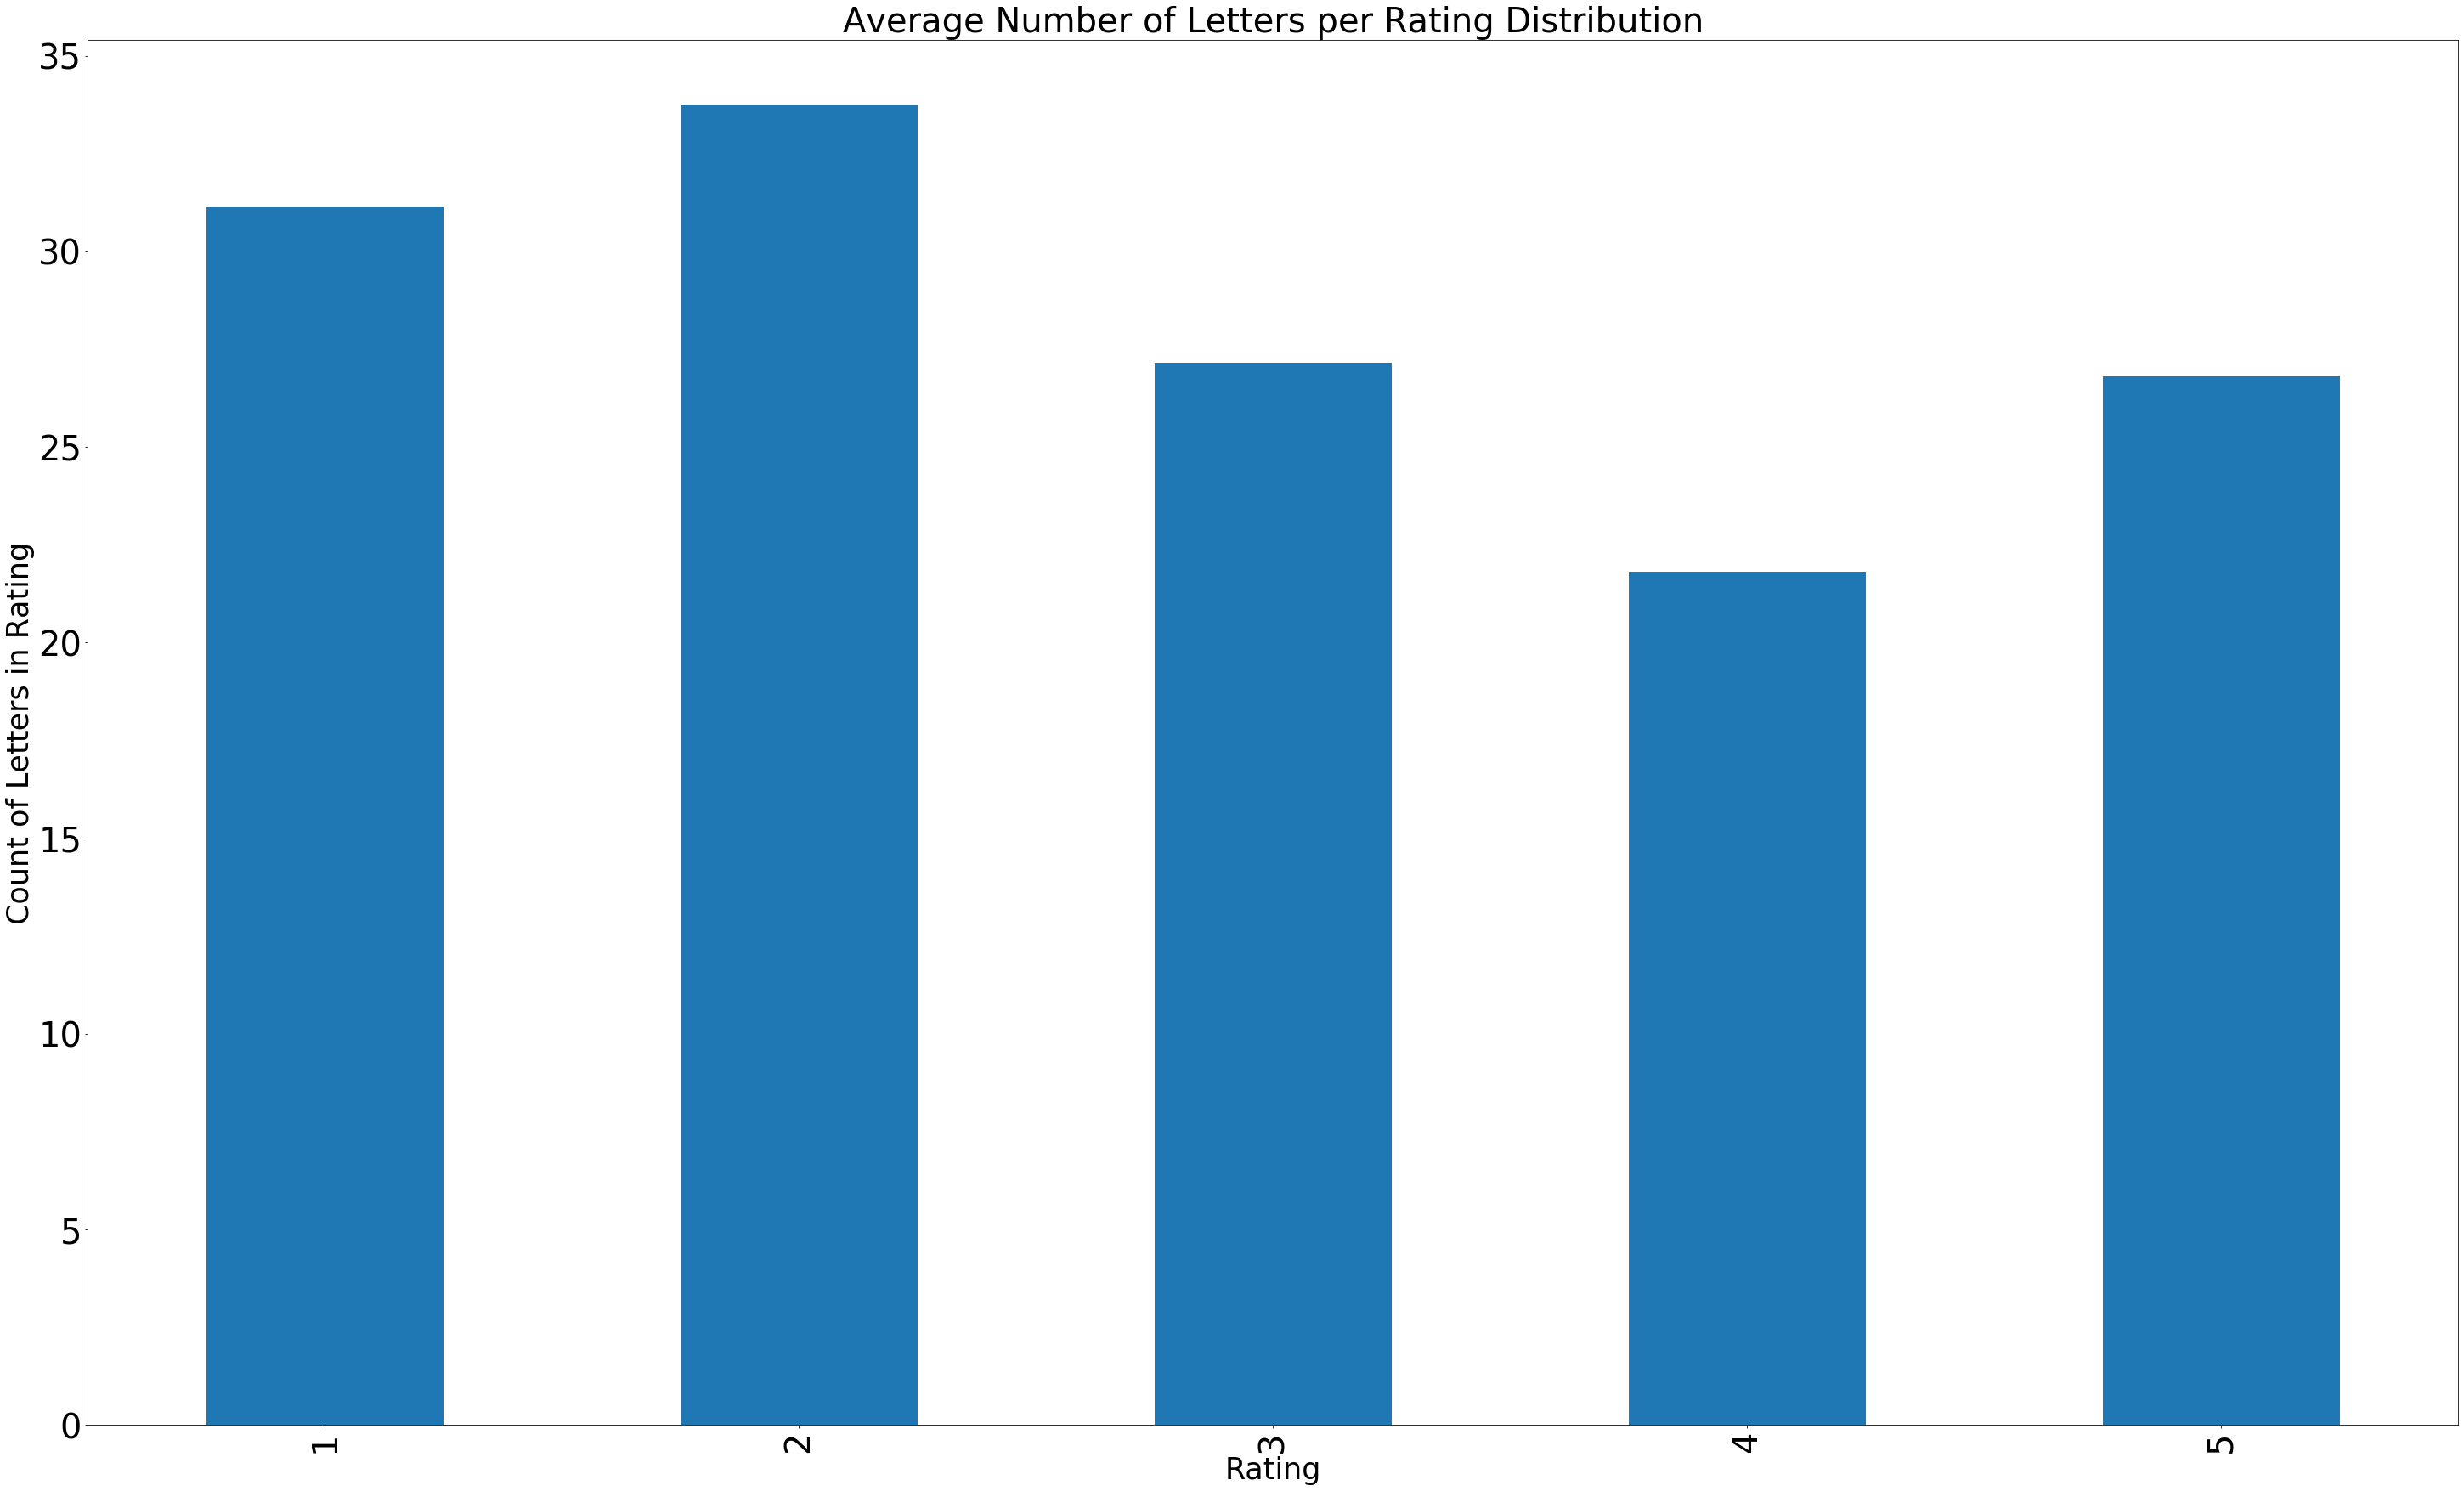

In [214]:
letter_avg = df.groupby('Rating')['review_len'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Rating', fontsize=35)
plt.ylabel('Count of Letters in Rating', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of Letters per Rating Distribution', fontsize=40)
plt.show()

# Average Number of Words per Rating Distribution

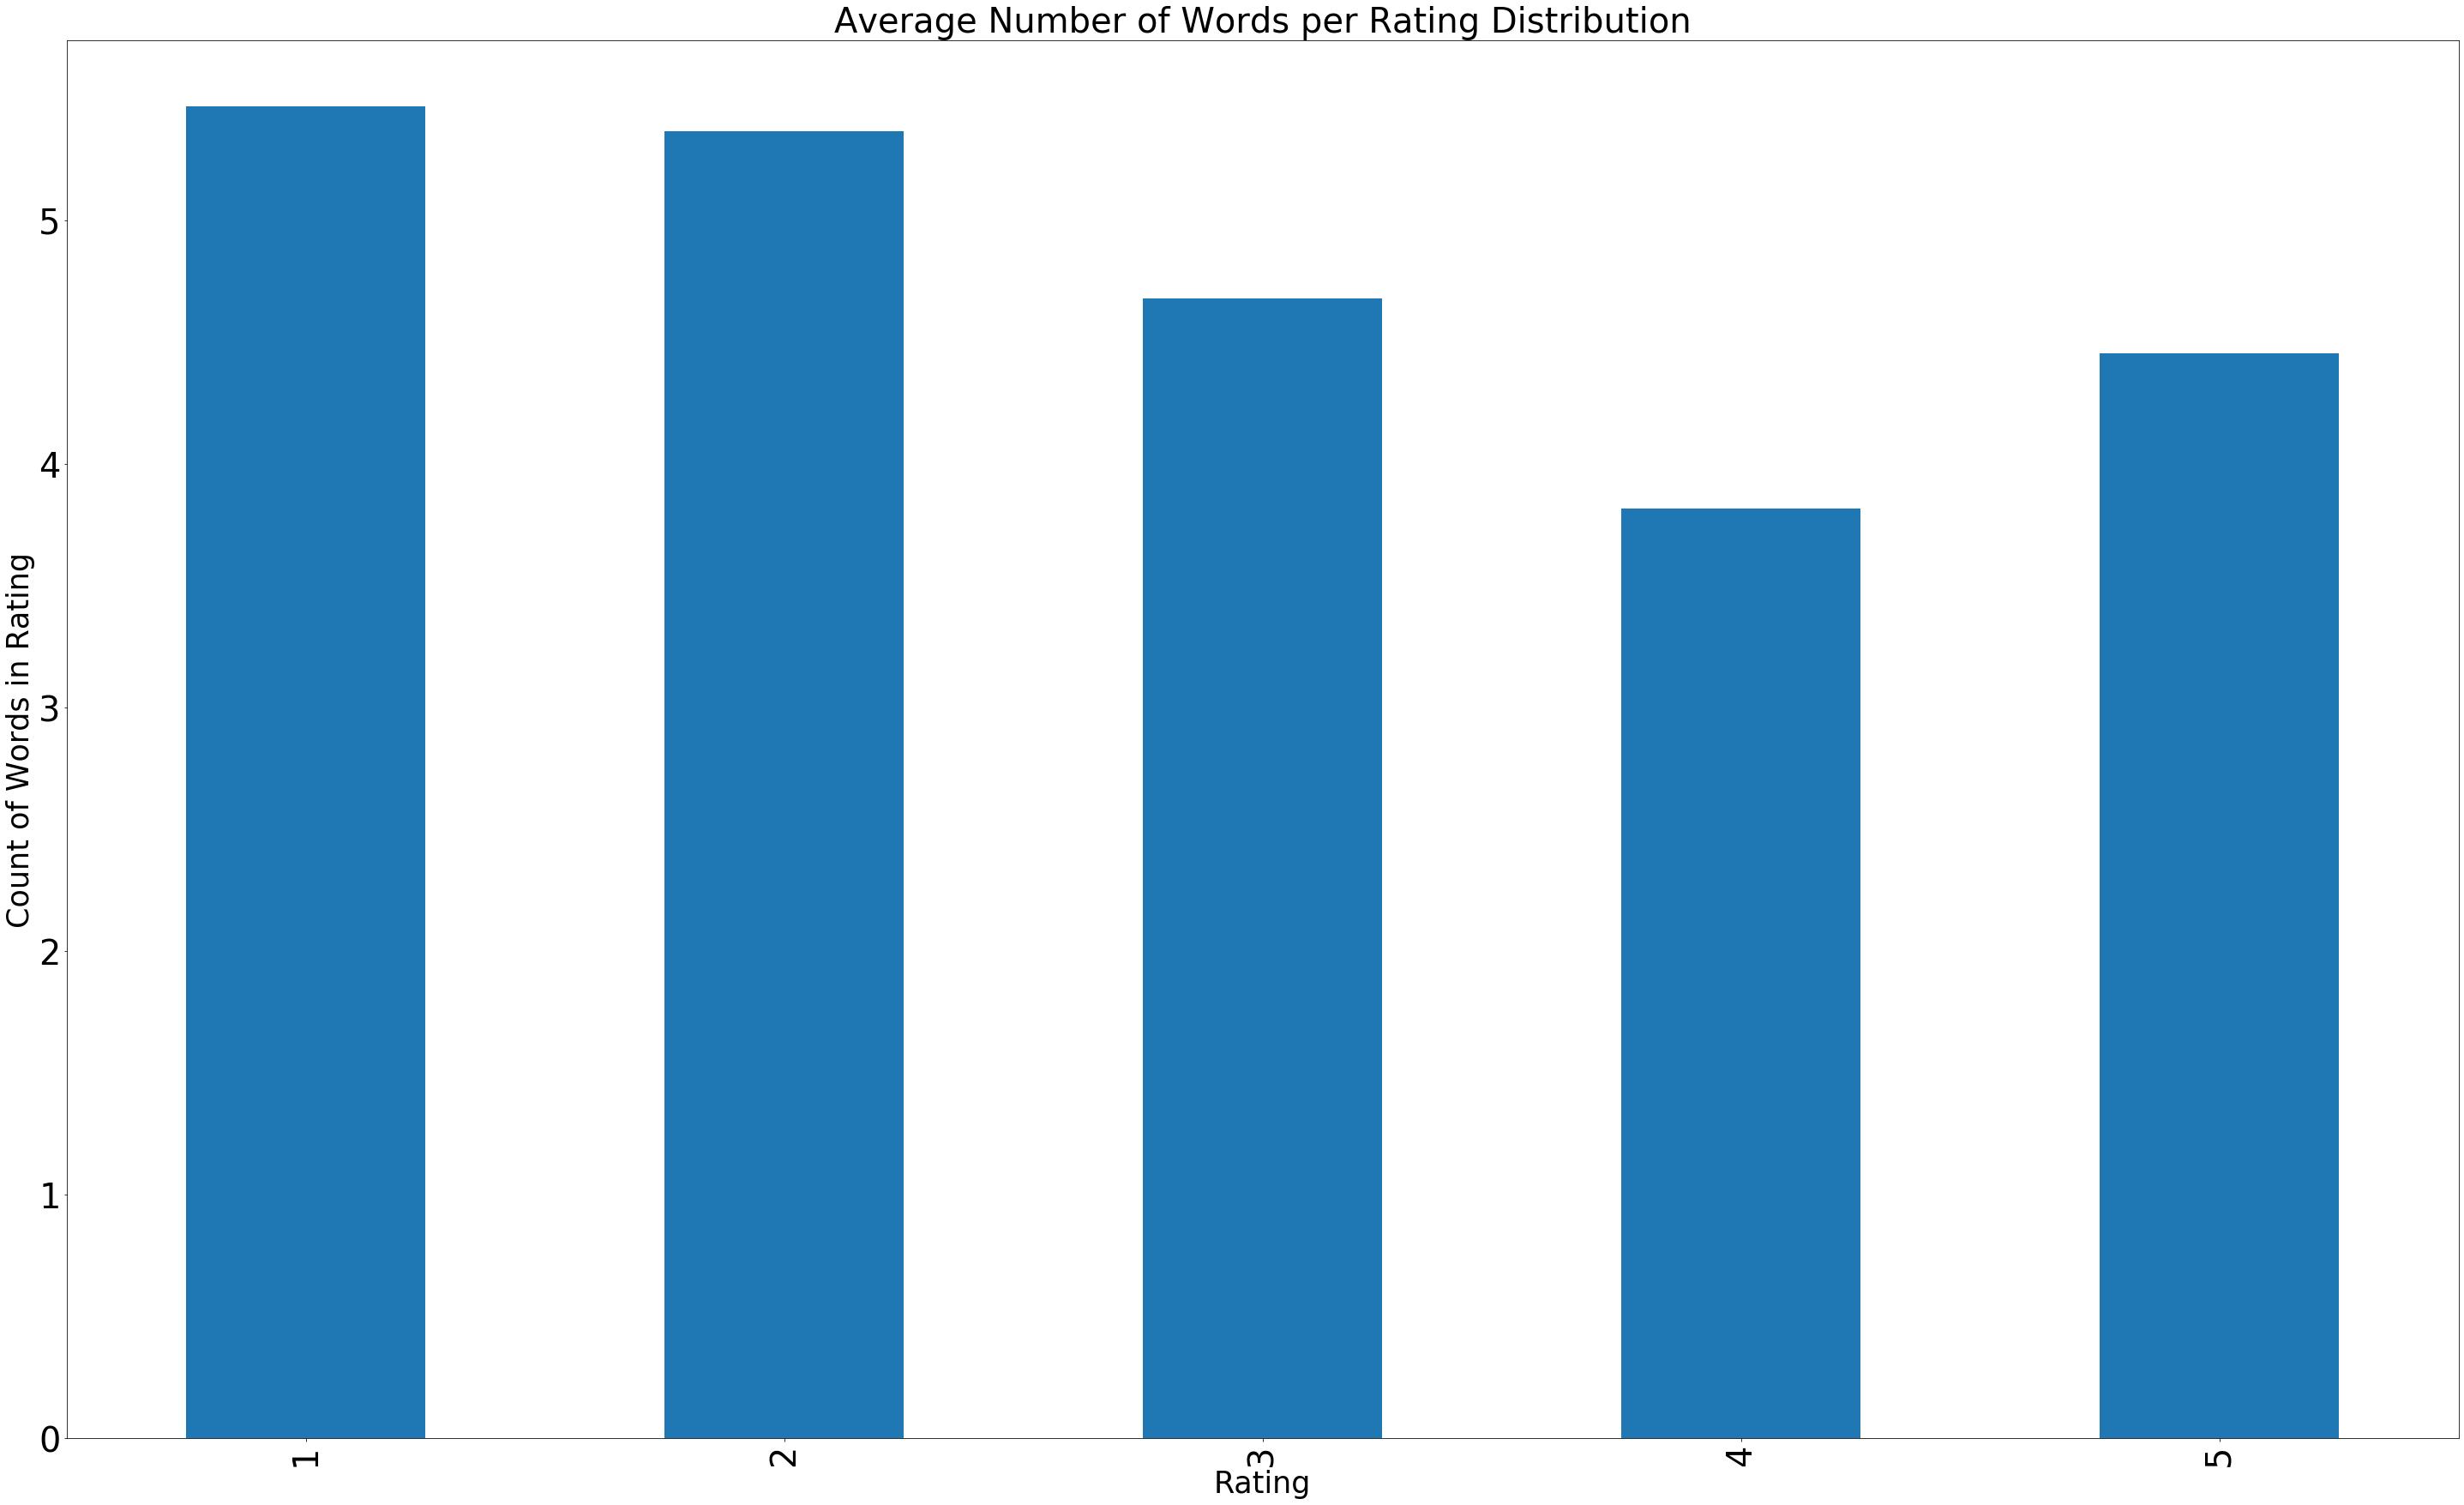

In [215]:
word_avg = df.groupby('Rating')['word_count'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Rating', fontsize=35)
plt.ylabel('Count of Words in Rating', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of Words per Rating Distribution', fontsize=40)
plt.show()

# Term Frequency Analysis

In [216]:
words = df['lemmatized']
allwords = []
for wordlist in words:
    allwords += wordlist
print(allwords)

['satisfactory', 'product', 'good', 'phone', 'good', 'colour', 'shin', 'perfect', 'look', 'perfect', 'work', 'reasonable', 'price', 'long', 'size', 'like', 'recommend', 'low', 'price', 'good', 'future', 'best', 'segment', 'uncompetitive', 'low', 'price', 'good', 'feature', 'camera', 'good', 'display', 'best', 'battery', 'full', 'day', 'performance', 'overall', 'ok', 'value', 'money', 'camera', 'low', 'ok', 'chalenga', 'nice', 'superb', 'camera', 'awesome', 'mobile', 'product', 'good', 'fingerprint', 'sometime', 'work', '...', 'go', 'best', 'mobile', '...', 'pic', 'beautiful', 'good', 'prodect', 'good', 'mobile', 'big', 'size', 'ram', 'always', 'well', 'processor', 'slow', 'camera', 'quality', 'good', 'performance', 'good', '2', 'week', 'mobile', 'work', 'bad', 'performance', 'good', 'produce', 'value', 'money', 'mobile', 'nice', '1000', 'nice', 'happy', 'v', 'good', 'phone', 'must', 'think', 'go', 'it..', 'great', 'phone', 'range', '...', 'good', 'product', 'good', '...', 'buy', 'good'

# Top 100 Most Common Words

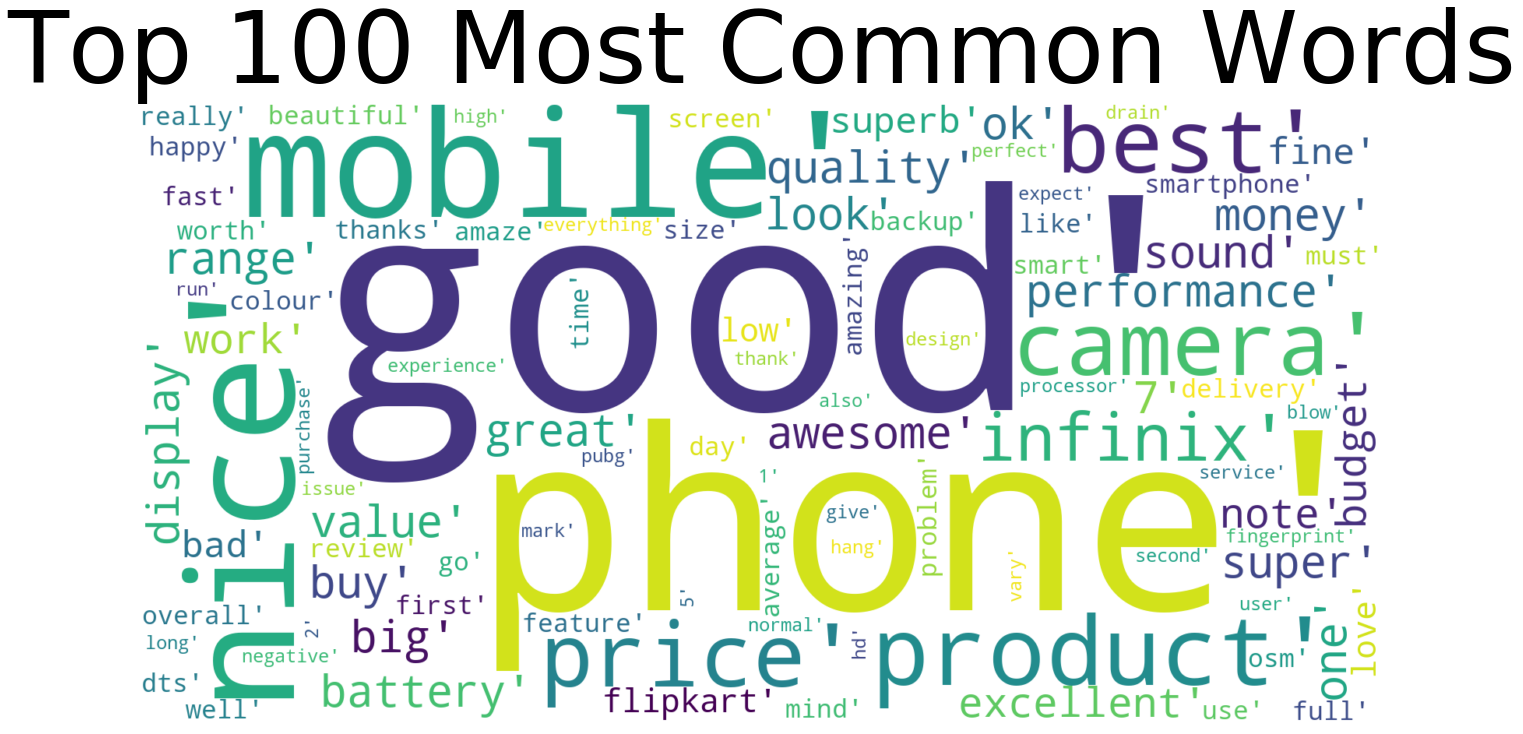

In [217]:
mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

# Frequency of 25 Most Common Words

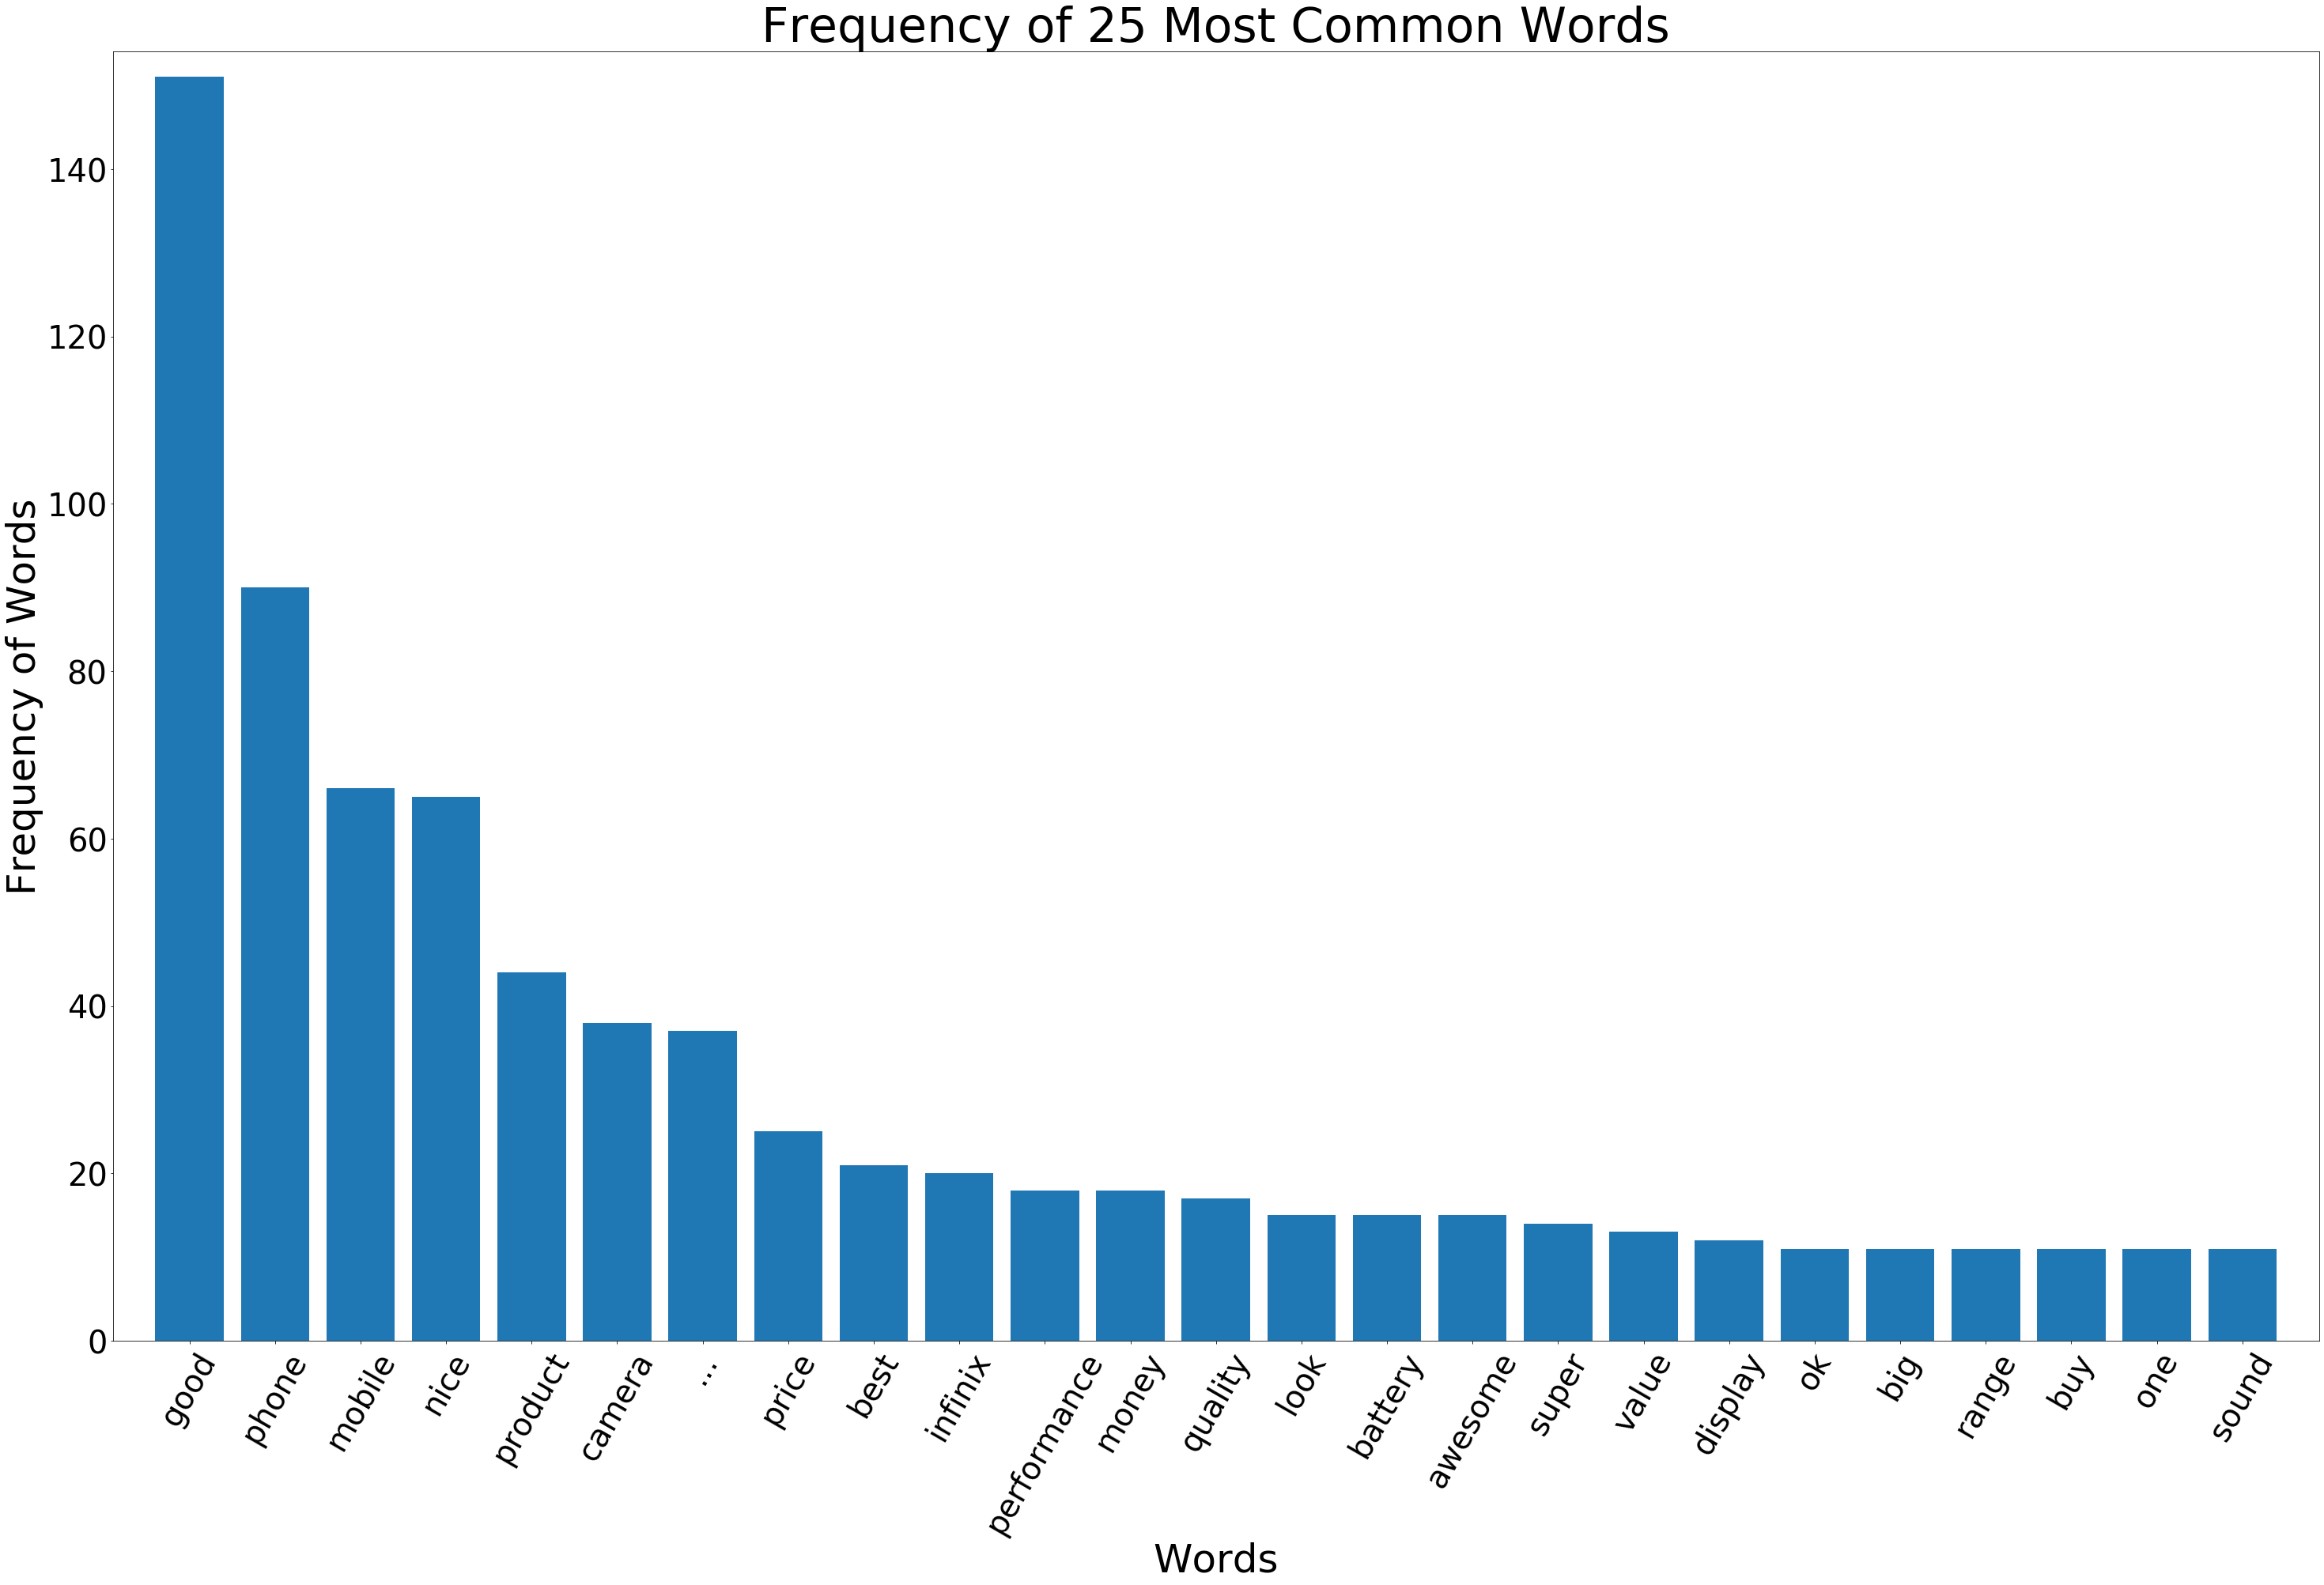

In [218]:
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

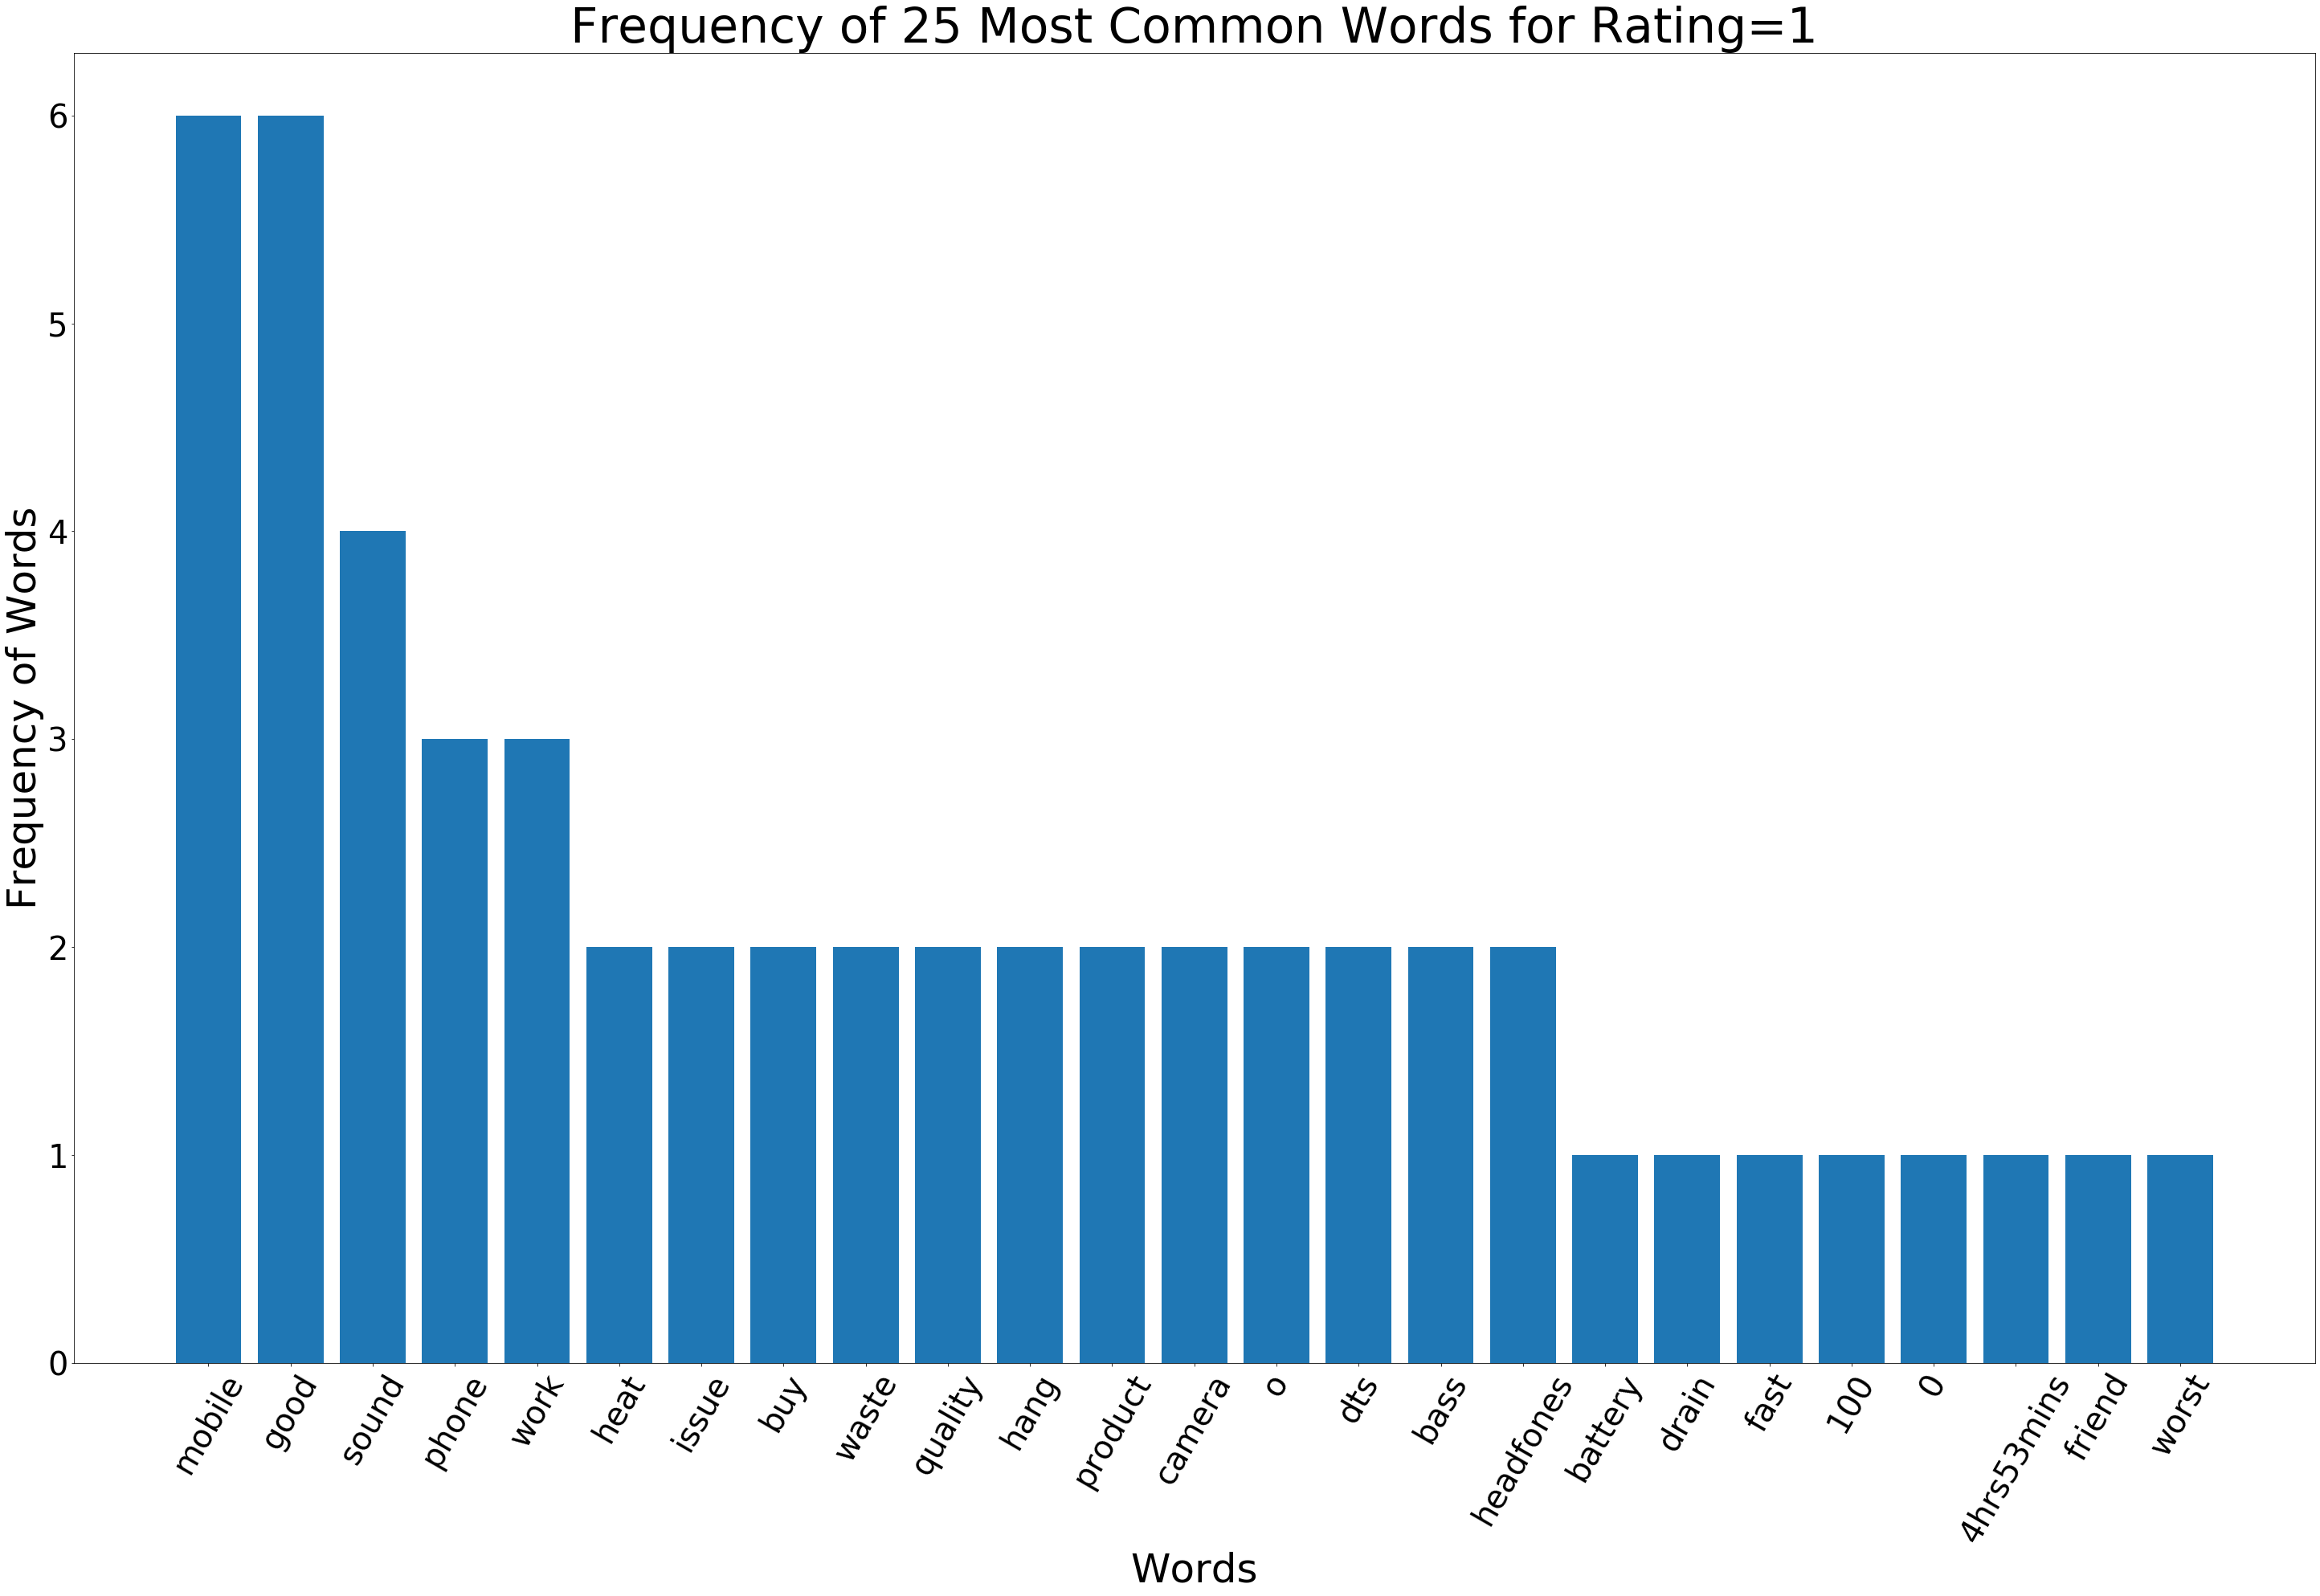

In [219]:
group_by = df.groupby('Rating')['lemma_str'].apply(lambda x: Counter(' '.join(x).split()).most_common(25))
group_by_0 = group_by.iloc[0]
words0 = list(zip(*group_by_0))[0]
freq0 = list(zip(*group_by_0))[1]
plt.figure(figsize=(50,30))
plt.bar(words0, freq0)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating=1', fontsize=60)
plt.show()

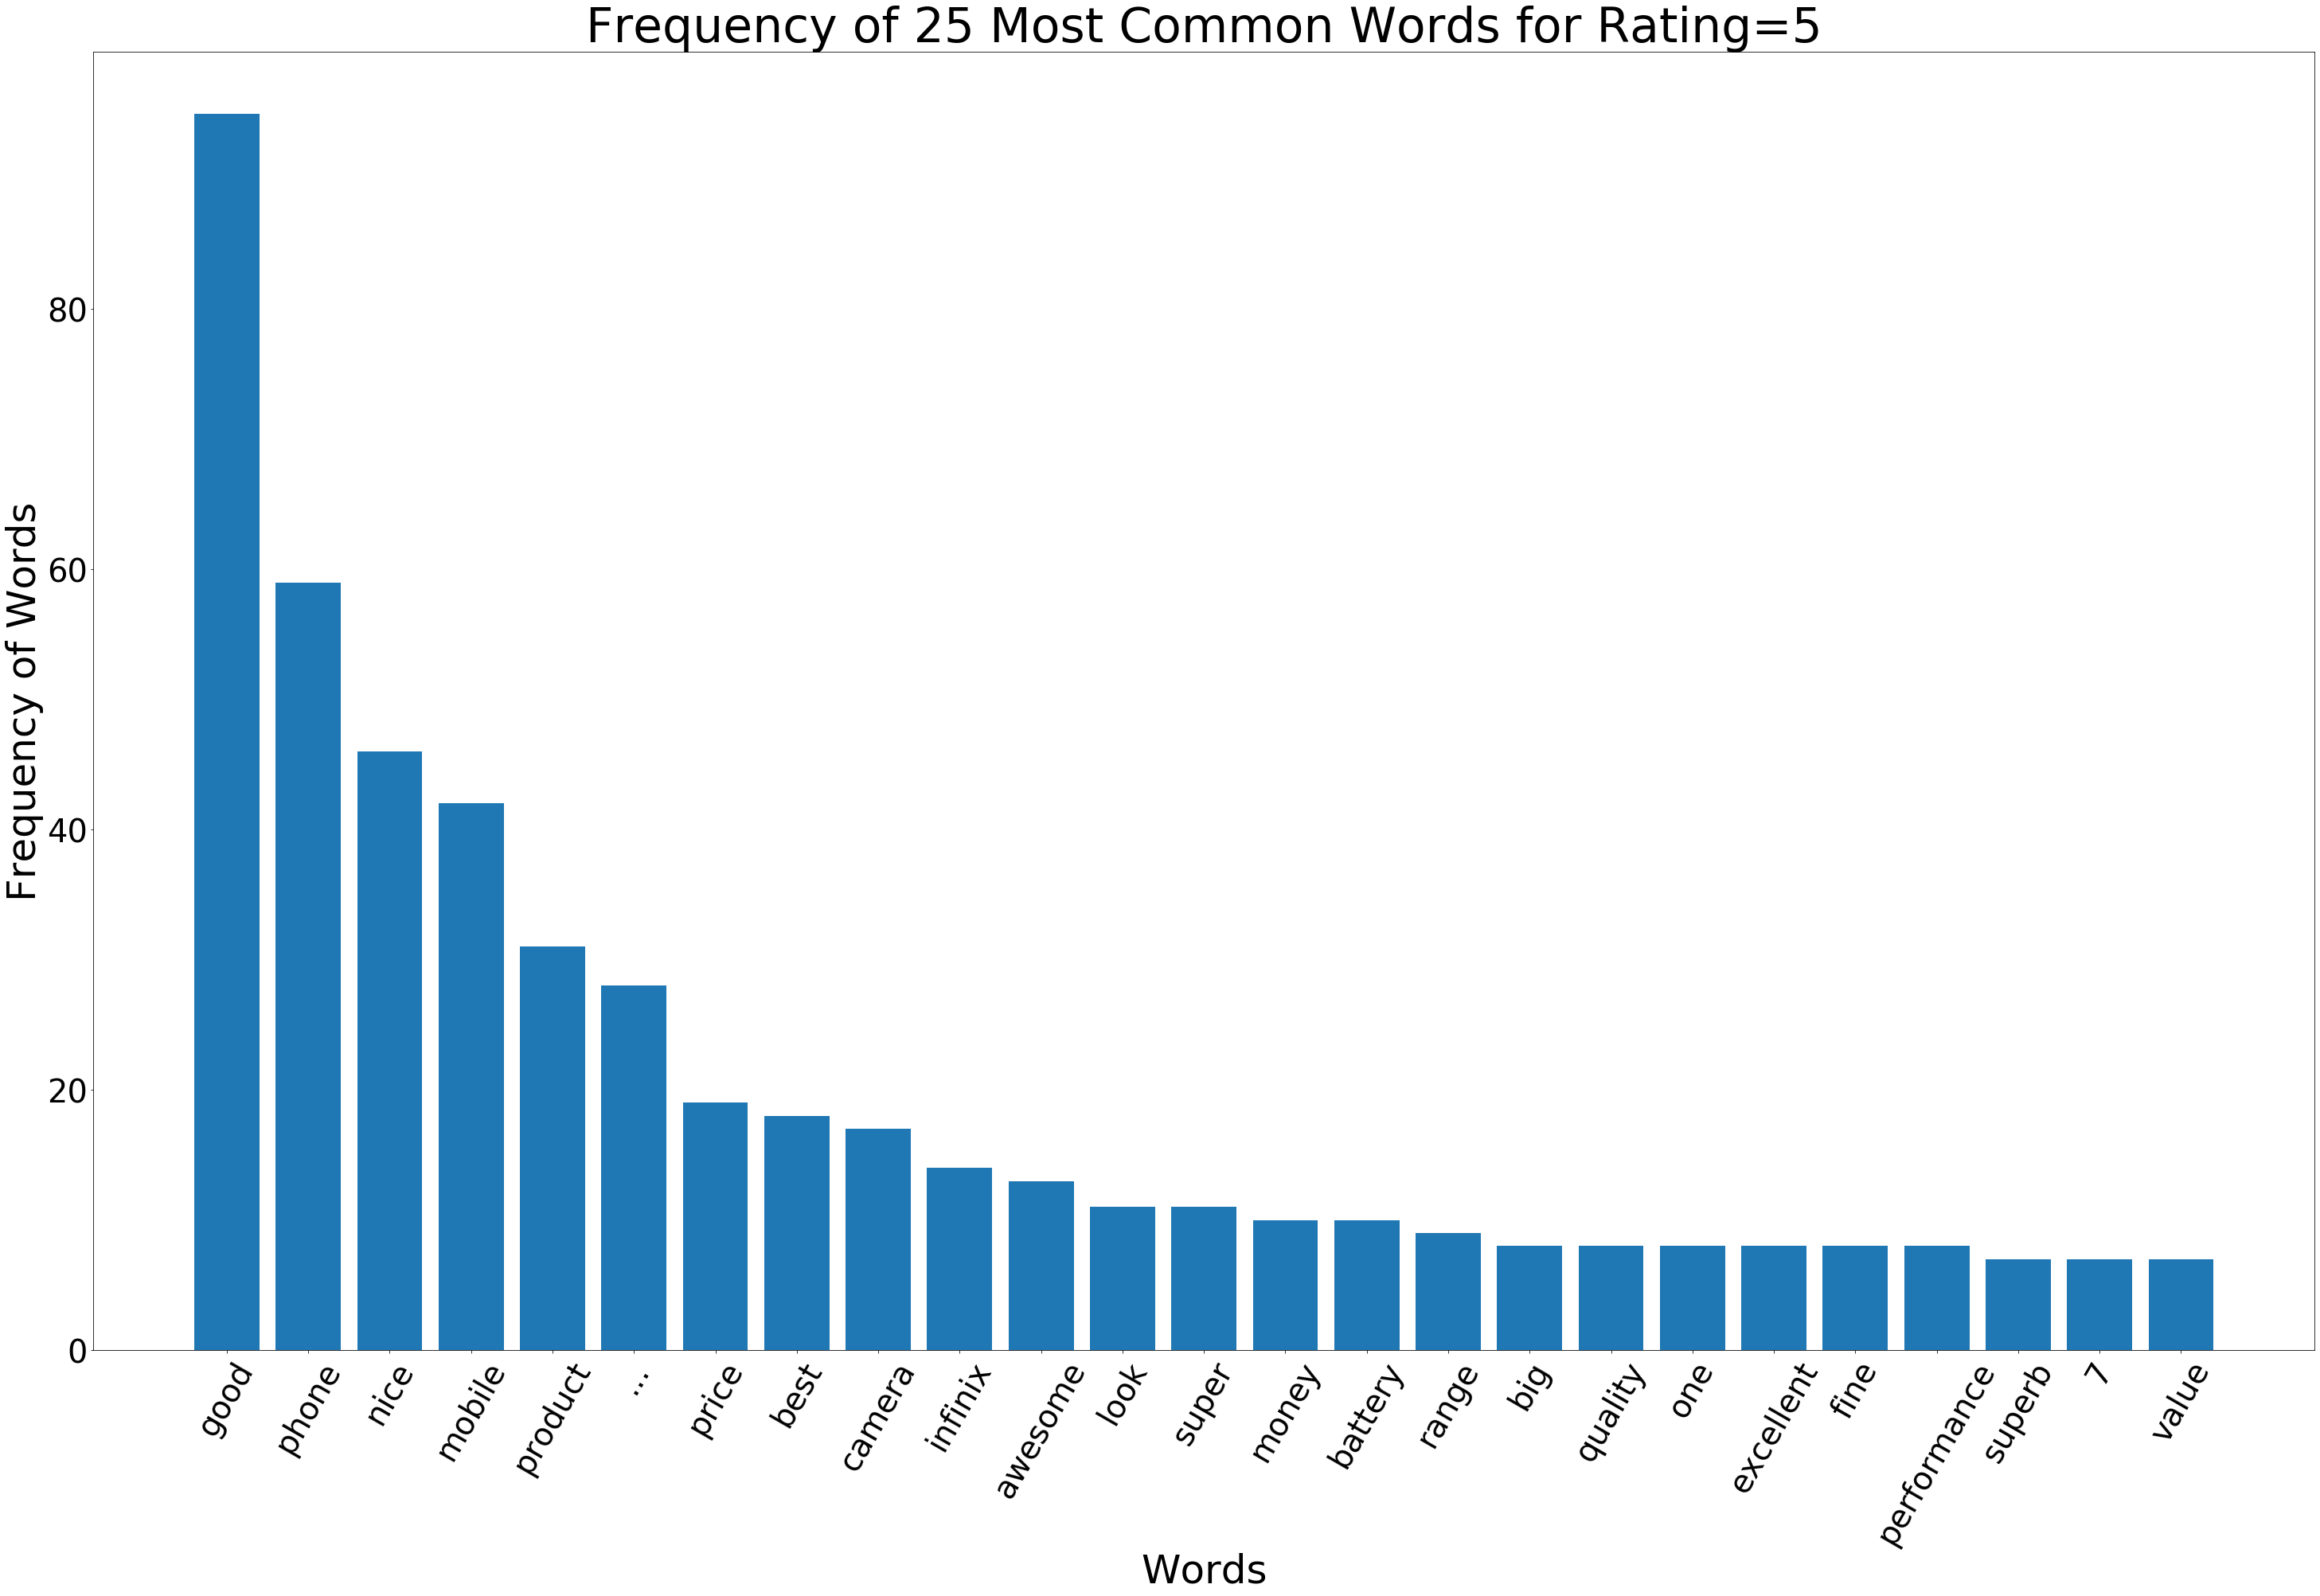

In [220]:
group_by_4 = group_by.iloc[4]
words4 = list(zip(*group_by_4))[0]
freq4 = list(zip(*group_by_4))[1]
plt.figure(figsize=(50,30))
plt.bar(words4, freq4)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating=5', fontsize=60)
plt.show()